In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
from labellines import labelLine, labelLines
from matplotlib.pyplot import cm
from importlib import reload

import src.utils as utils

In [2]:
reload(utils)

<module 'src.utils' from '/Users/leonardobaggiani/Desktop/GitHub/amm-fees/src/utils.py'>

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"
plt.rc("text", usetex = True)
plt.rc("text.latex", preamble=r'\usepackage{amsmath,amsfonts}')
fs = 21
dpi = 300

In [4]:
depth = 100*1_000*1_000.
y_0 = 1_000

In [5]:
y_grid = np.array([np.sqrt((depth) / (depth / ((y_0) ** 2) - i * 0.1)) for i in range(-20, 21)])

import pickle

params = { "int_sell": 50., "int_buy": 50., "kappa": 2., "oracleprice": 100., "depth": depth, "y_grid": y_grid, "y_0": y_0, "T": 1., "pen_const": 0.,}

with open("src/params.pkl", "wb") as f:pickle.dump(params,f)

In [6]:
import pickle

with open('src/params.pkl', 'rb') as f:
    params = pickle.load(f)

In [7]:
params

{'int_sell': 50.0,
 'int_buy': 50.0,
 'kappa': 2.0,
 'oracleprice': 100.0,
 'depth': 100000000.0,
 'y_grid': array([ 990.14754298,  990.6332666 ,  991.11970575,  991.60686218,
         992.09473767,  992.58333397,  993.07265287,  993.56269616,
         994.05346561,  994.54496303,  995.03719021,  995.53014897,
         996.02384111,  996.51826846,  997.01343285,  997.50933611,
         998.00598007,  998.50336658,  999.0014975 ,  999.50037469,
        1000.        , 1000.50037531, 1001.0015025 , 1001.50338346,
        1002.00602007, 1002.50941423, 1003.01356786, 1003.51848285,
        1004.02416113, 1004.53060462, 1005.03781526, 1005.54579498,
        1006.05454573, 1006.56406946, 1007.07436814, 1007.58544372,
        1008.09729818, 1008.60993351, 1009.12335168, 1009.63755469,
        1010.15254455]),
 'y_0': 1000,
 'T': 1.0,
 'pen_const': 0.0}

In [8]:
AMM = utils.first_approximation(**params)

In [9]:
p,m = AMM._calculate_fees_t(0.5)
lin_p, lin_m, slope_p, slope_m = AMM.get_linear_fees(0.5)

In [10]:
p[-1] = np.nan
m[0] = np.nan
lin_p[-1] = np.nan
lin_m[0] = np.nan

In [11]:
theta_rad_p = np.arctan(slope_p)
theta_deg_p = np.degrees(theta_rad_p) - 38

theta_rad_m = np.arctan(slope_p)
theta_deg_m = np.degrees(theta_rad_m) + 38

# Optimal fees as a function of quantity at $t=0.5$.

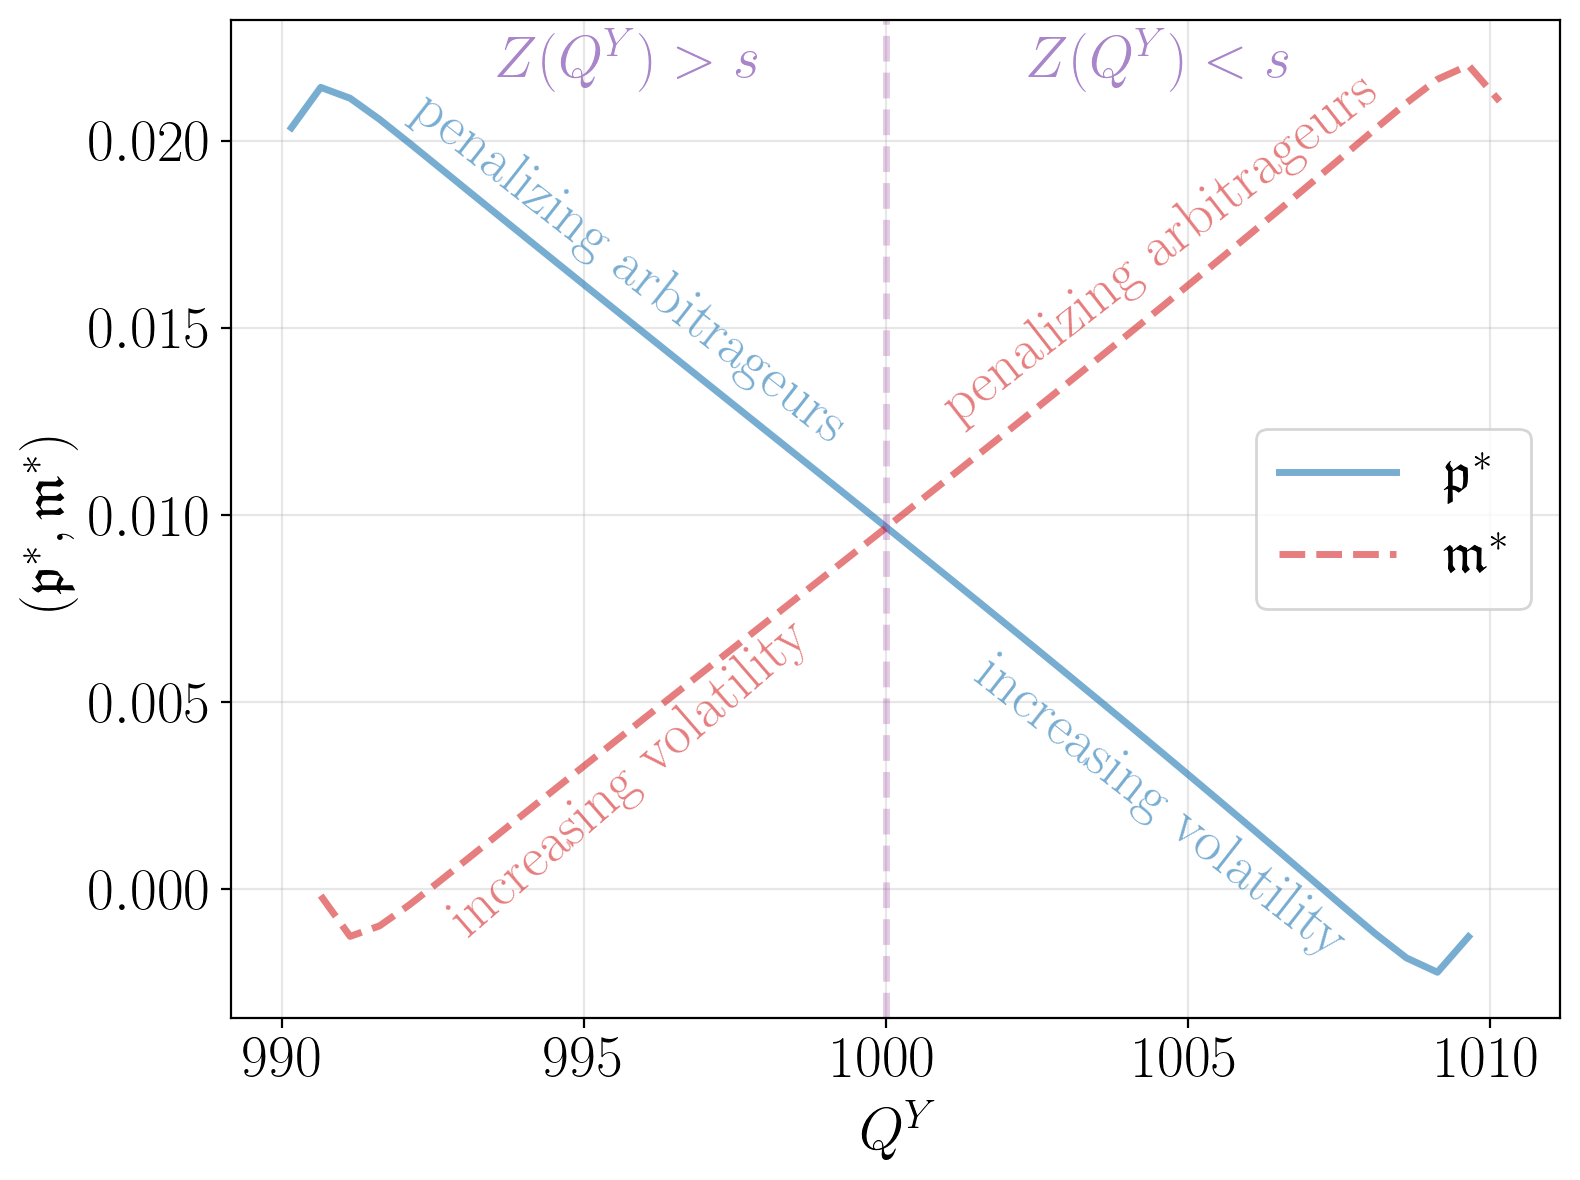

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, p[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, m[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*$', color='tab:red', alpha=0.6)

ax.text(0.3, 0.75, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.7, 0.77, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:red',alpha=0.6, rotation = theta_deg_m)
ax.text(0.7, 0.21, r"$\mathrm{increasing}~\mathrm{volatility}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.3, 0.24, r"$\mathrm{increasing}~\mathrm{volatility}$", 
        transform=ax.transAxes, fontsize=fs, ha='center', va='center', 
        color='tab:red', alpha=0.6, rotation=theta_deg_m + 3)

ax.axvline(x=AMM.y_0, color='purple', linestyle='--', linewidth=2.5, alpha=0.2)
ax.text(0.3, 0.96, r"$Z(Q^{Y}) > s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)
ax.text(0.7,0.96, r"$Z(Q^{Y}) < s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity.pdf', format="pdf", dpi=dpi)
plt.show()

# Linear fees as a function of quantity at $t=0.5$.

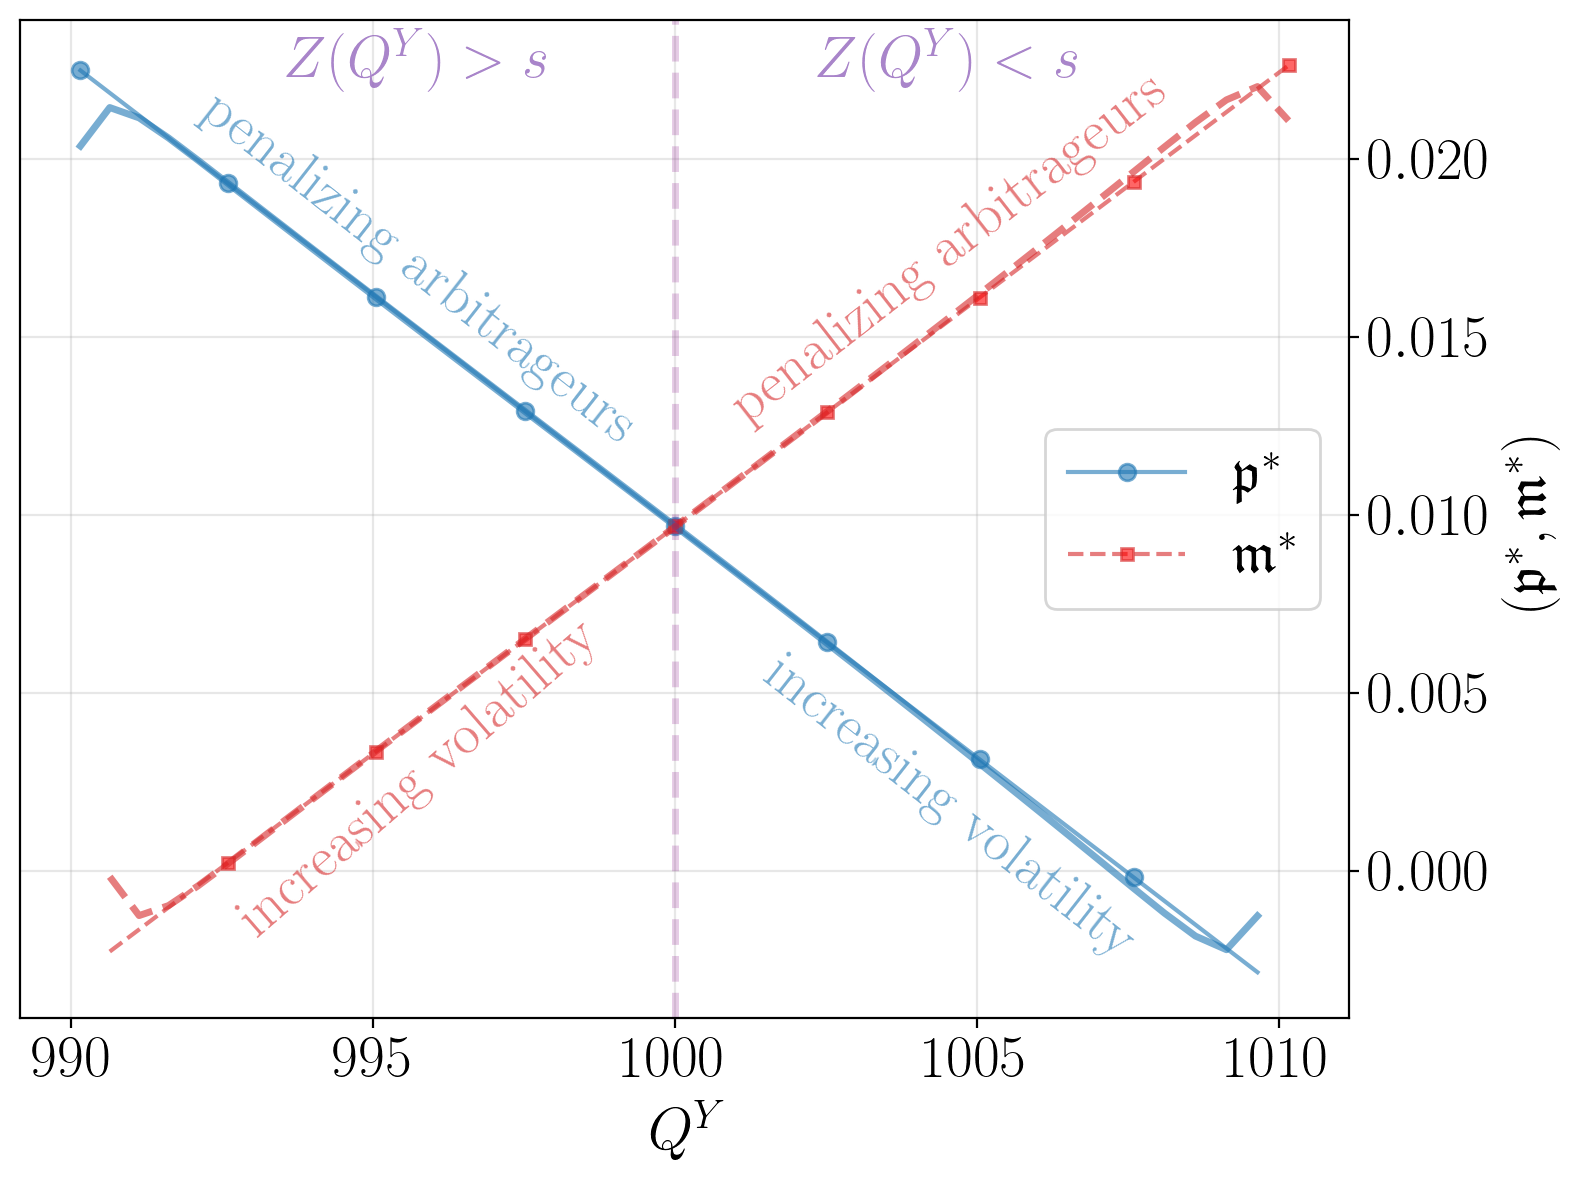

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, lin_p[:], '-o', label = r'$\mathfrak{p}^*$' , color='tab:blue', alpha=0.6, markevery=5)
ax.plot(AMM.y_grid, lin_m[:], '--s', label = r'$\mathfrak{m}^*$', color='tab:red', alpha=0.6, markersize=4, markerfacecolor='red', markevery=5)
ax.plot(AMM.y_grid, p[:], '-', linewidth = 2.5, color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, m[:], '--', linewidth = 2.5, color='tab:red', alpha=0.6)

ax.text(0.3, 0.75, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.7, 0.77, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:red',alpha=0.6, rotation = theta_deg_m)
ax.text(0.7, 0.21, r"$\mathrm{increasing}~\mathrm{volatility}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.3, 0.24, r"$\mathrm{increasing}~\mathrm{volatility}$", 
        transform=ax.transAxes, fontsize=fs, ha='center', va='center', 
        color='tab:red', alpha=0.6, rotation=theta_deg_m + 3)

ax.axvline(x=AMM.y_0, color='purple', linestyle='--', linewidth=2.5, alpha=0.2)
ax.text(0.3, 0.96, r"$Z(Q^{Y}) > s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)
ax.text(0.7,0.96, r"$Z(Q^{Y}) < s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)

ax.yaxis.tick_right()  
ax.yaxis.set_label_position("right")  

plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5), fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)

plt.tight_layout()
plt.savefig('figures/Linear_Fees_on_quantity.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of quantity at $t=0.5$ for $k=1$.

In [14]:
params["kappa"] = 1

In [15]:
AMM = utils.first_approximation(**params)
p,m = AMM._calculate_fees_t(0.5)
p[-1] = np.nan
m[0] = np.nan

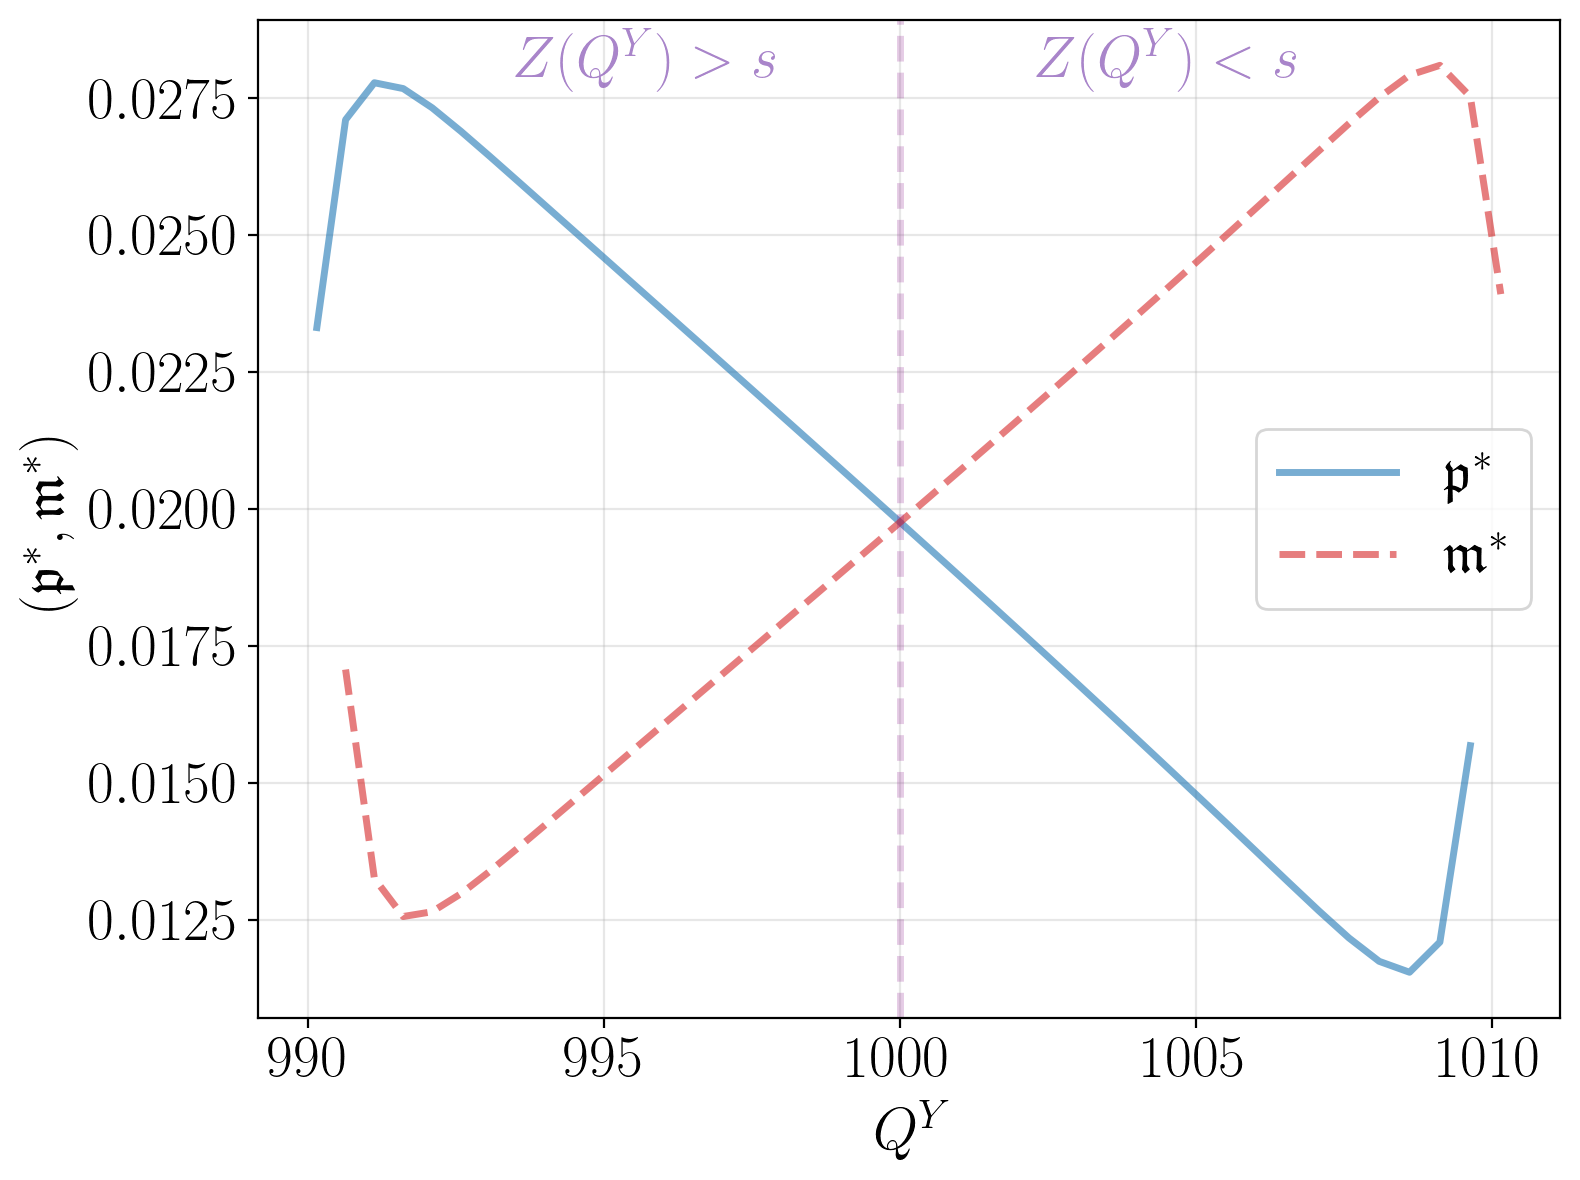

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid,   p[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid,  m[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*$', color='tab:red', alpha=0.6)

ax.axvline(x=AMM.y_0, color='purple', linestyle='--', linewidth=2.5, alpha=0.2)
ax.text(0.3, 0.96, r"$Z(Q^{Y}) > s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)
ax.text(0.7,0.96, r"$Z(Q^{Y}) < s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_k=1.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of quantity at $t=0.5$ for $k=0.25$.

In [17]:
params["kappa"] = 0.25

In [18]:
AMM = utils.first_approximation(**params)
p,m = AMM._calculate_fees_t(0.5)
p[-1] = np.nan
m[0] = np.nan

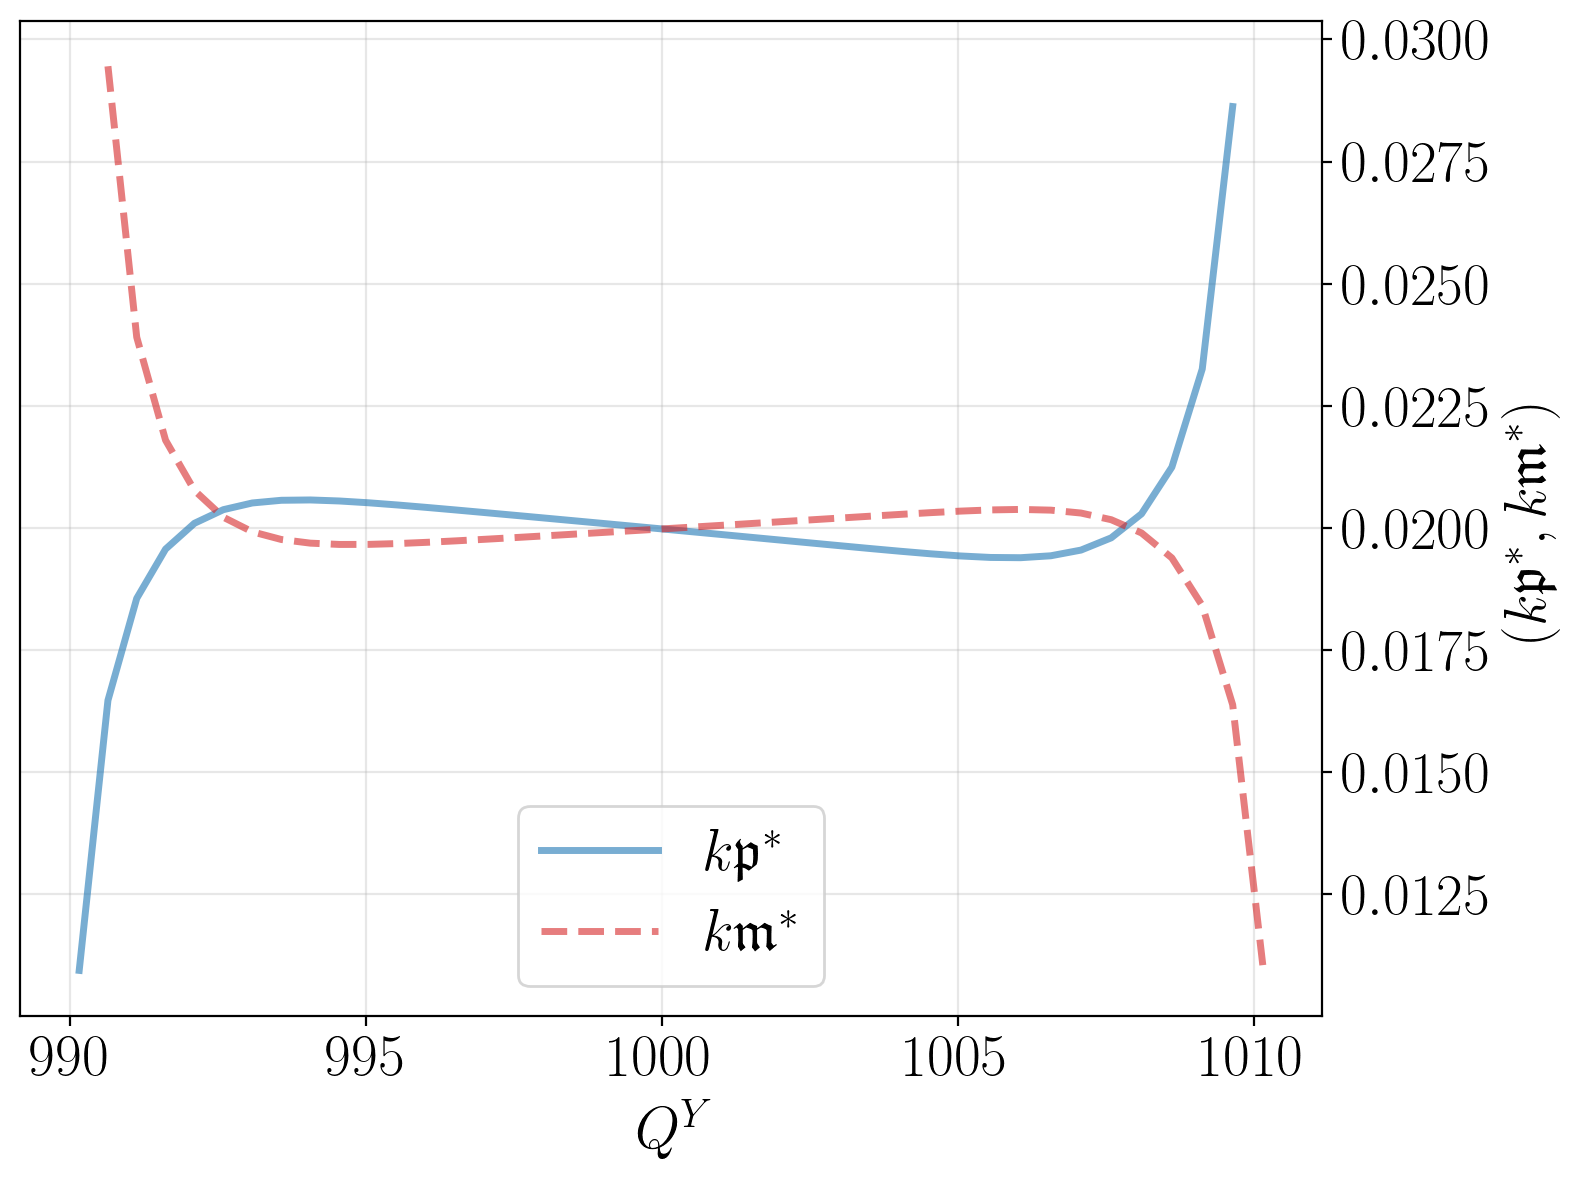

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, AMM.kappa * p[:], '-', linewidth = 2.5, label = r'$k\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, AMM.kappa * m[:], '--', linewidth = 2.5, label = r'$k\mathfrak{m}^*$', color='tab:red', alpha=0.6)

ax.yaxis.tick_right()  
ax.yaxis.set_label_position("right")  

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(k\mathfrak{p}^*, k\mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_k=0.25.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of quantity at $t=0.5$ for $k=0.1$.

In [20]:
params["kappa"] = 0.1

In [21]:
AMM = utils.first_approximation(**params)
p,m = AMM._calculate_fees_t(0.5)
p[-1] = np.nan
m[0] = np.nan

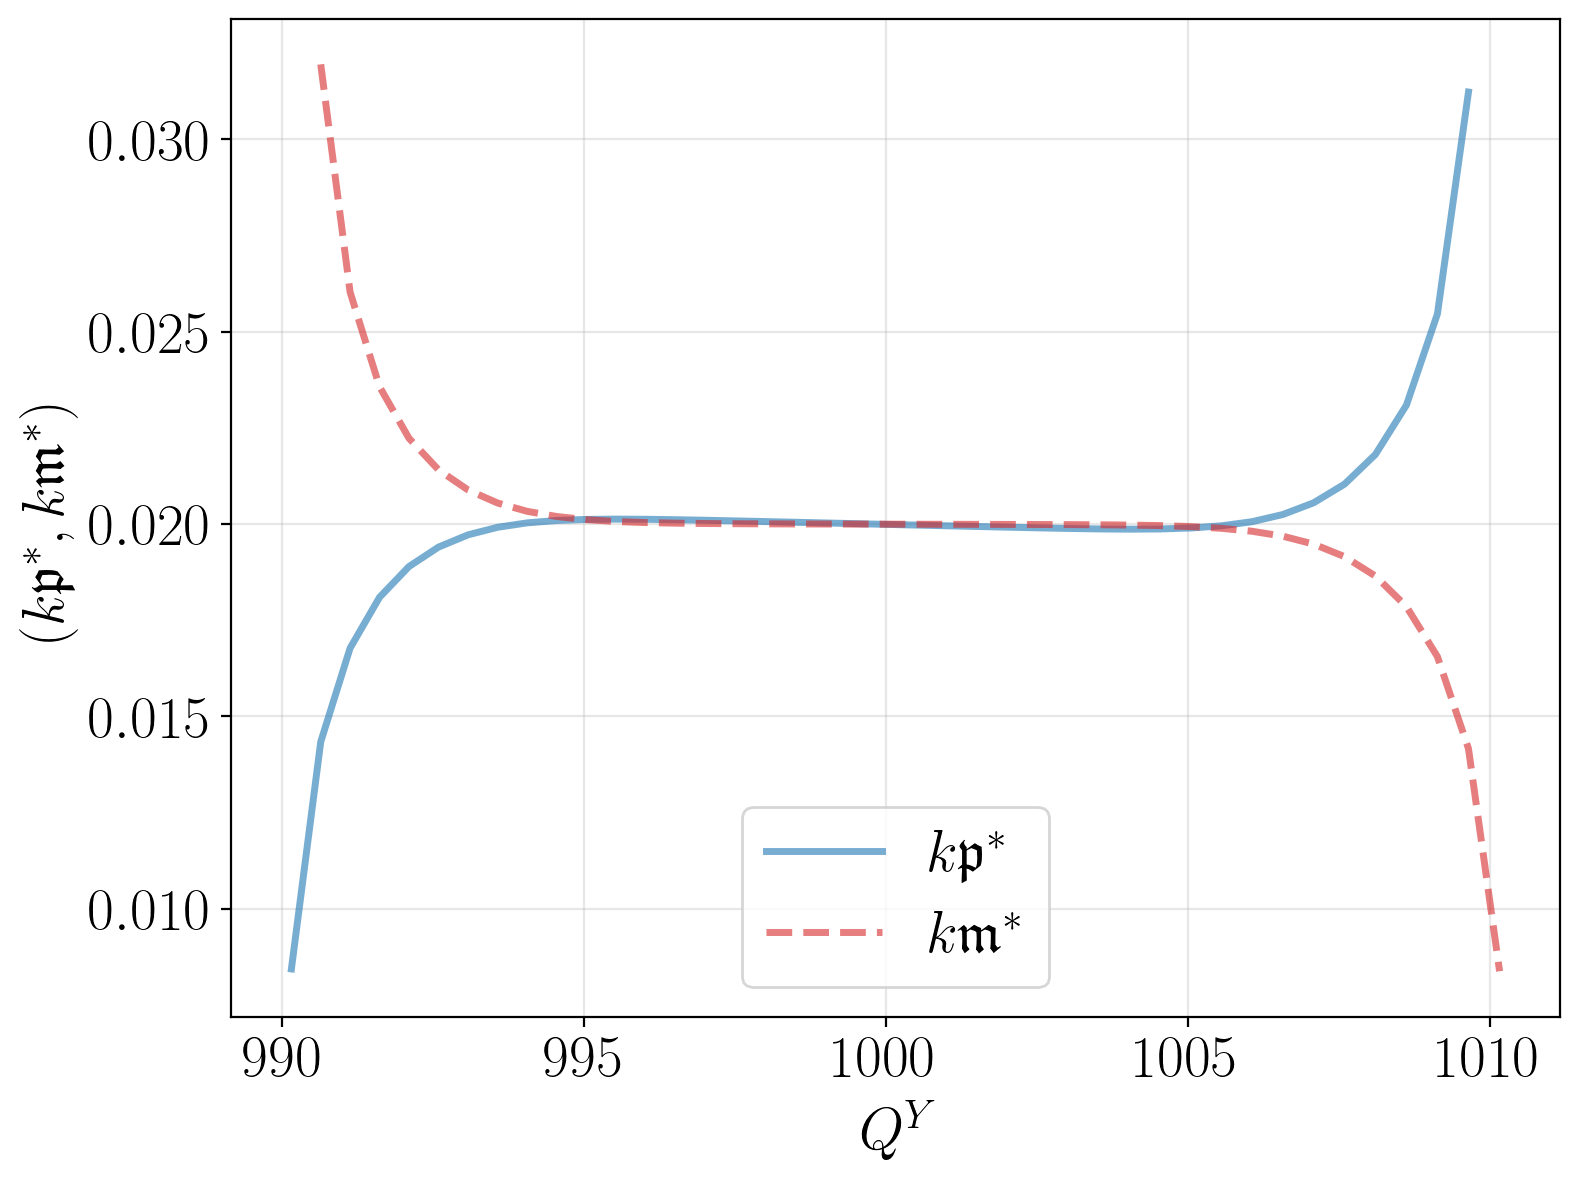

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, AMM.kappa * p[:], '-', linewidth = 2.5, label = r'$k\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, AMM.kappa * m[:], '--', linewidth = 2.5, label = r'$k\mathfrak{m}^*$', color='tab:red', alpha=0.6)


plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(k\mathfrak{p}^*, k\mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_k=0.1.pdf', format="pdf", dpi=dpi)
plt.show()

# Behaviour of the fees at limit $k \to 0$.

In [23]:
p_0,m_0 = AMM._calculate_fees_k_0_t(0.5)

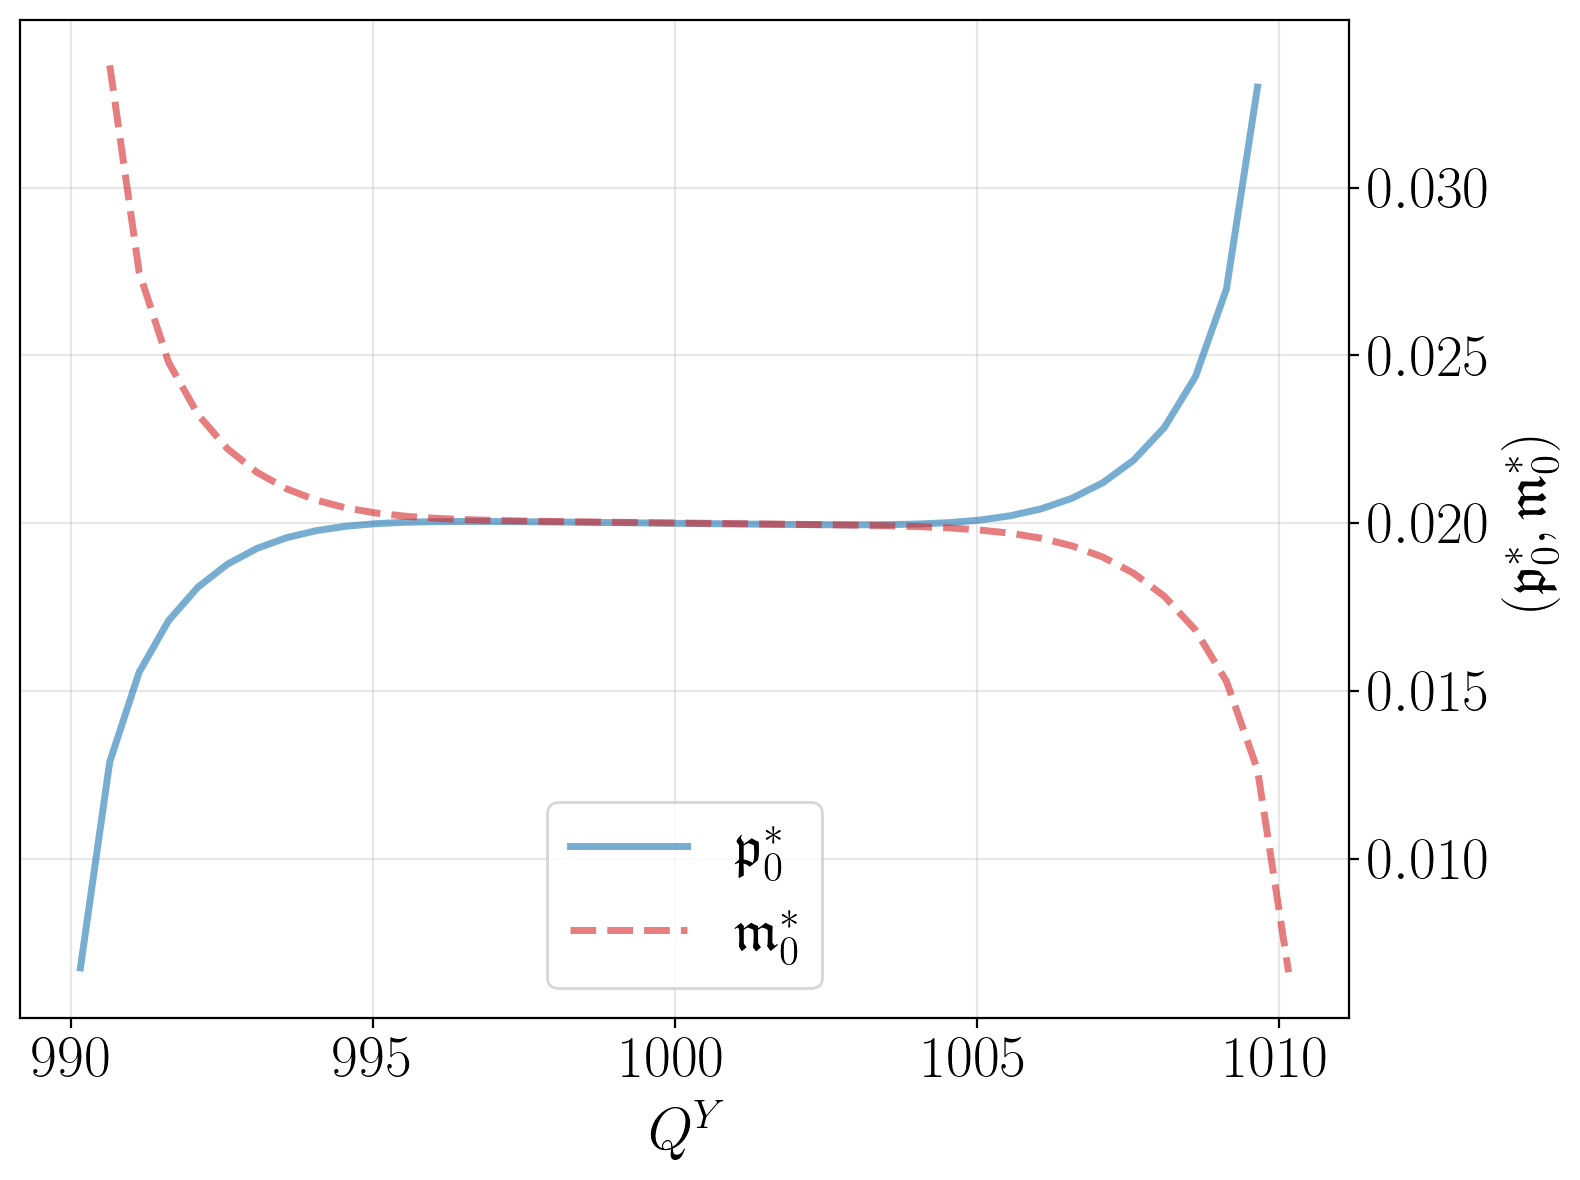

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(AMM.y_grid, p_0[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*_0$' , color='tab:blue', alpha=0.6)
ax.plot(AMM.y_grid, m_0[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*_0$', color='tab:red', alpha=0.6)


ax.yaxis.tick_right()  
ax.yaxis.set_label_position("right") 

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*_0, \mathfrak{m}^*_0)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_k=0.pdf', format="pdf", dpi=dpi)
plt.show()

# Fees depending on $\phi$ for $k=2$

In [25]:
params["kappa"] = 2

In [26]:
pen_const_value = np.array([0,50,100])

In [27]:
p = np.ones((len(AMM.y_grid), len(pen_const_value)))
m = np.ones_like(p)
for i, pen_const in enumerate(pen_const_value):
    params["pen_const"] = pen_const
    AMM = utils.first_approximation(**params)
    p[:,i], m[:,i] = AMM._calculate_fees_t(0.5)
    p[-1,i] = np.nan
    m[0:i] = np.nan

In [28]:
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = plt.get_cmap("viridis")

norm = Normalize(vmin = min(pen_const_value), vmax = max(pen_const_value))
sm = ScalarMappable(norm = norm, cmap=cmap)

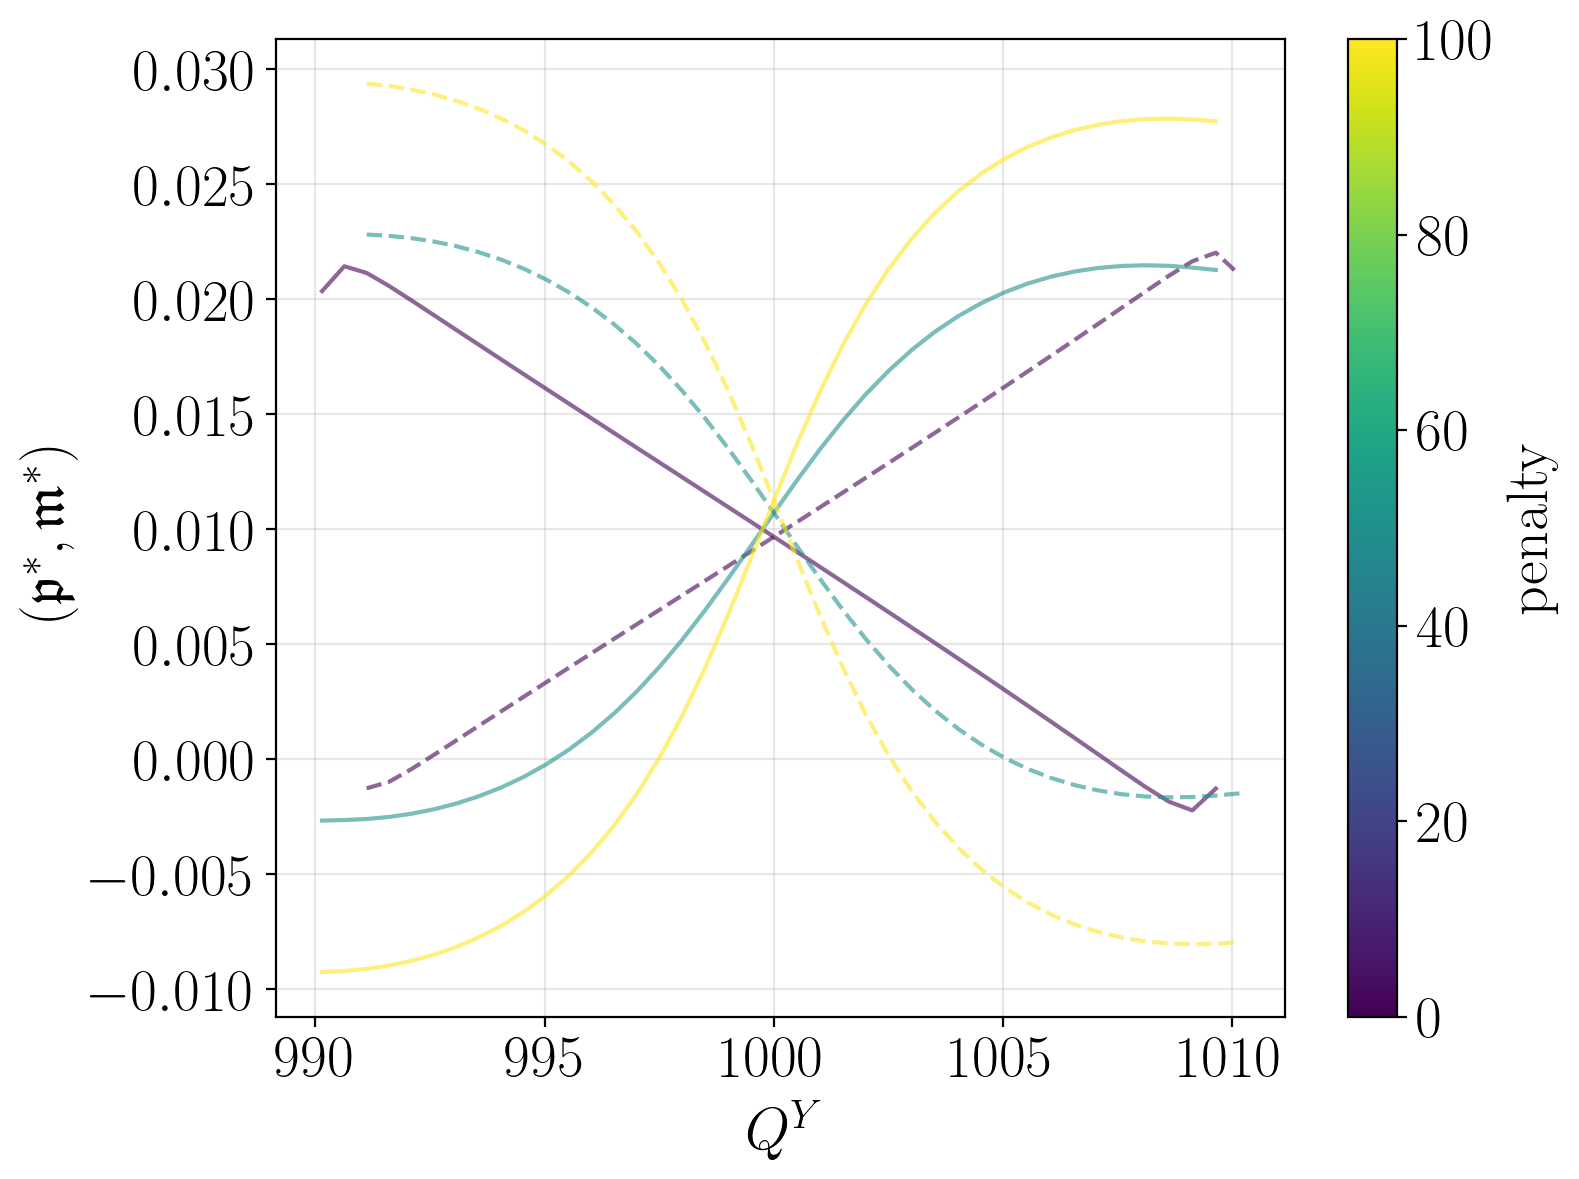

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

for i,pen in enumerate(pen_const_value):
    color = cmap(norm(pen_const_value[i]))
    ax.plot(AMM.y_grid, p[:,i], '-', color=color, alpha=0.6)
    ax.plot(AMM.y_grid, m[:,i], '--', color=color, alpha=0.6)


plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)

cbar = fig.colorbar(sm, ax = ax, orientation = "vertical")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"$\mathrm{penalty}$", fontsize=fs)

plt.tight_layout()
plt.savefig('figures/Optimal_Fees_Nonzero_penalty_k=2.pdf', format="pdf", dpi=dpi)
plt.show()

# Fees depending on $\phi$ for $k=0.1$

In [30]:
params["kappa"] = 0.1

In [31]:
p = np.ones((len(AMM.y_grid), len(pen_const_value)))
m = np.ones_like(p)
for i, pen_const in enumerate(pen_const_value):
    params["pen_const"] = pen_const
    AMM = utils.first_approximation(**params)
    p[:,i], m[:,i] = AMM._calculate_fees_t(0.5)
    p[-1,i] = np.nan
    m[0:i] = np.nan

In [32]:
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

cmap = plt.get_cmap("viridis")

norm = Normalize(vmin = min(pen_const_value), vmax = max(pen_const_value))
sm = ScalarMappable(norm = norm, cmap=cmap)

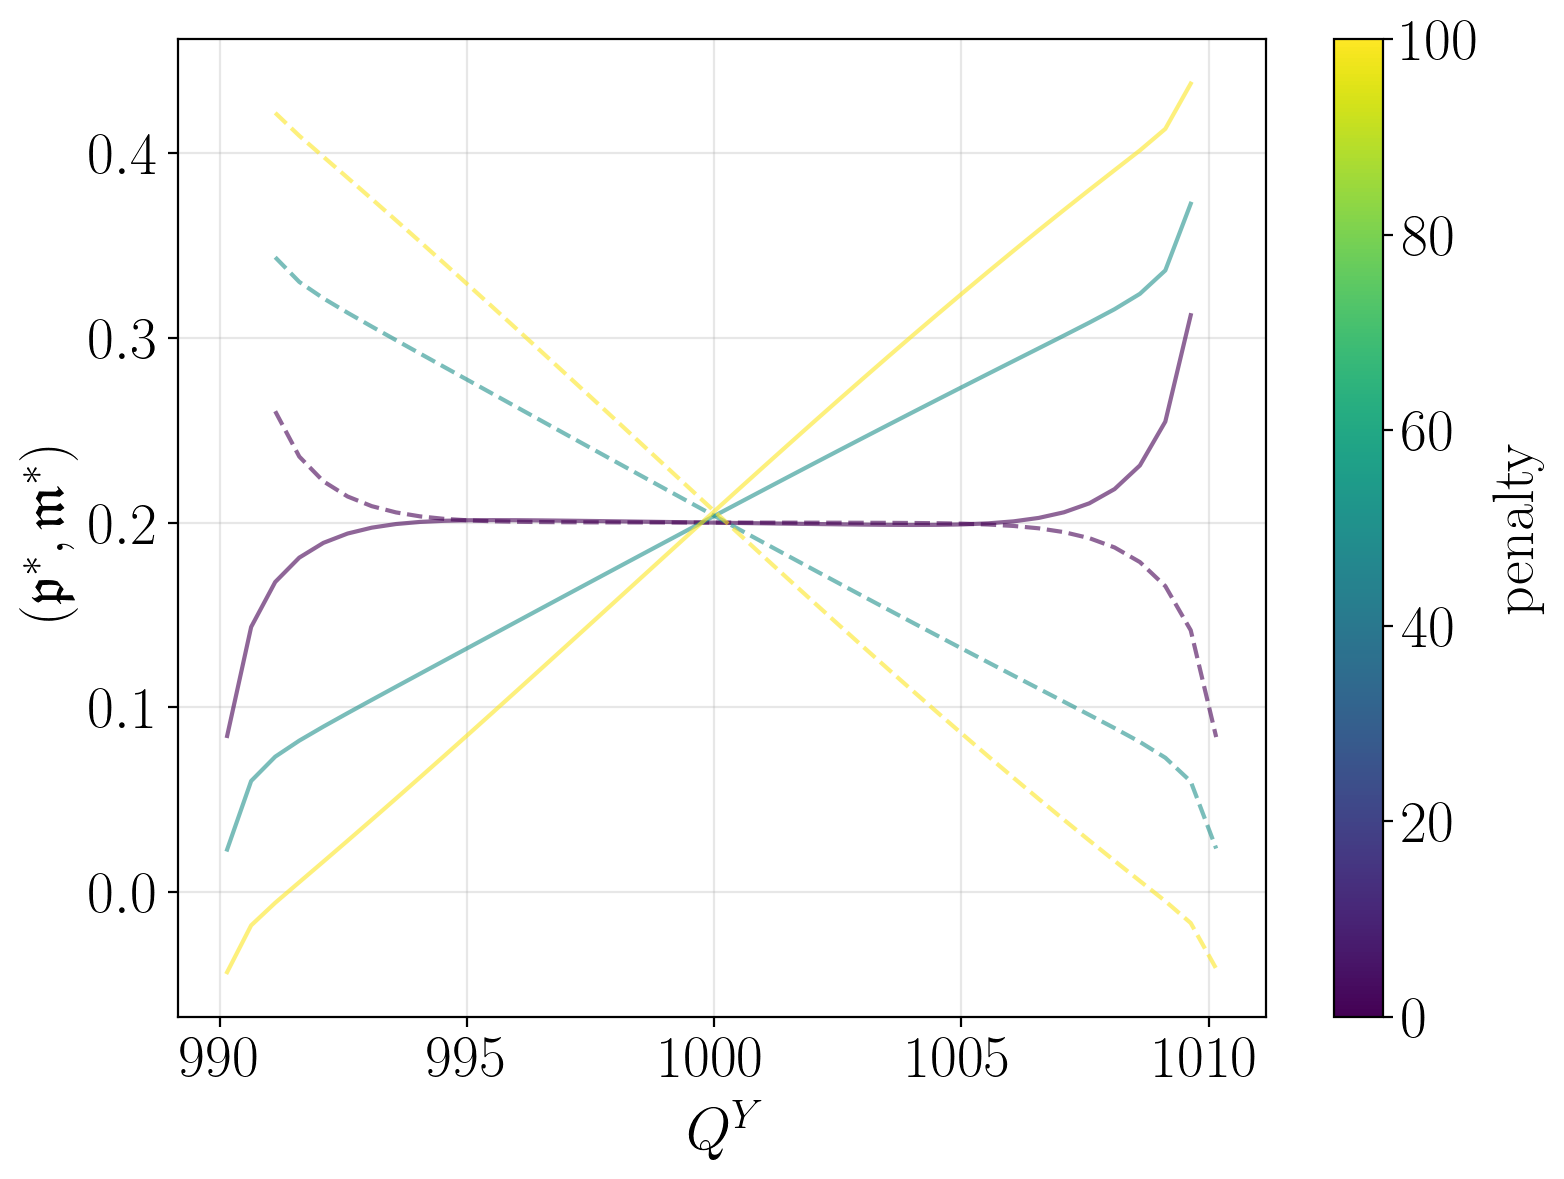

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

for i,pen in enumerate(pen_const_value):
    color = cmap(norm(pen_const_value[i]))
    ax.plot(AMM.y_grid, p[:,i], '-', color=color, alpha=0.6)
    ax.plot(AMM.y_grid, m[:,i], '--', color=color, alpha=0.6)


plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)

cbar = fig.colorbar(sm, ax = ax, orientation = "vertical")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"$\mathrm{penalty}$", fontsize=fs)

plt.tight_layout()
plt.savefig('figures/Optimal_Fees_Nonzero_penalty_k=0.1.pdf', format="pdf", dpi=dpi)
plt.show()

# Fees as a function of time for k=2

In [34]:
params["kappa"] = 2
params["pen_const"] = 0
AMM = utils.first_approximation(**params)

In [35]:
Nt = 1000
t_vector = np.linspace(0, AMM.T,num=Nt)

p = np.ones((len(AMM.y_grid), len(t_vector)))
m = np.ones_like(p)

for i,t in enumerate(t_vector):
    p[:,i],m[:,i] = AMM._calculate_fees_t(t)

In [36]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin=min(AMM.y_grid), vmax=max(AMM.y_grid))
sm = ScalarMappable(norm=norm, cmap=cmap)

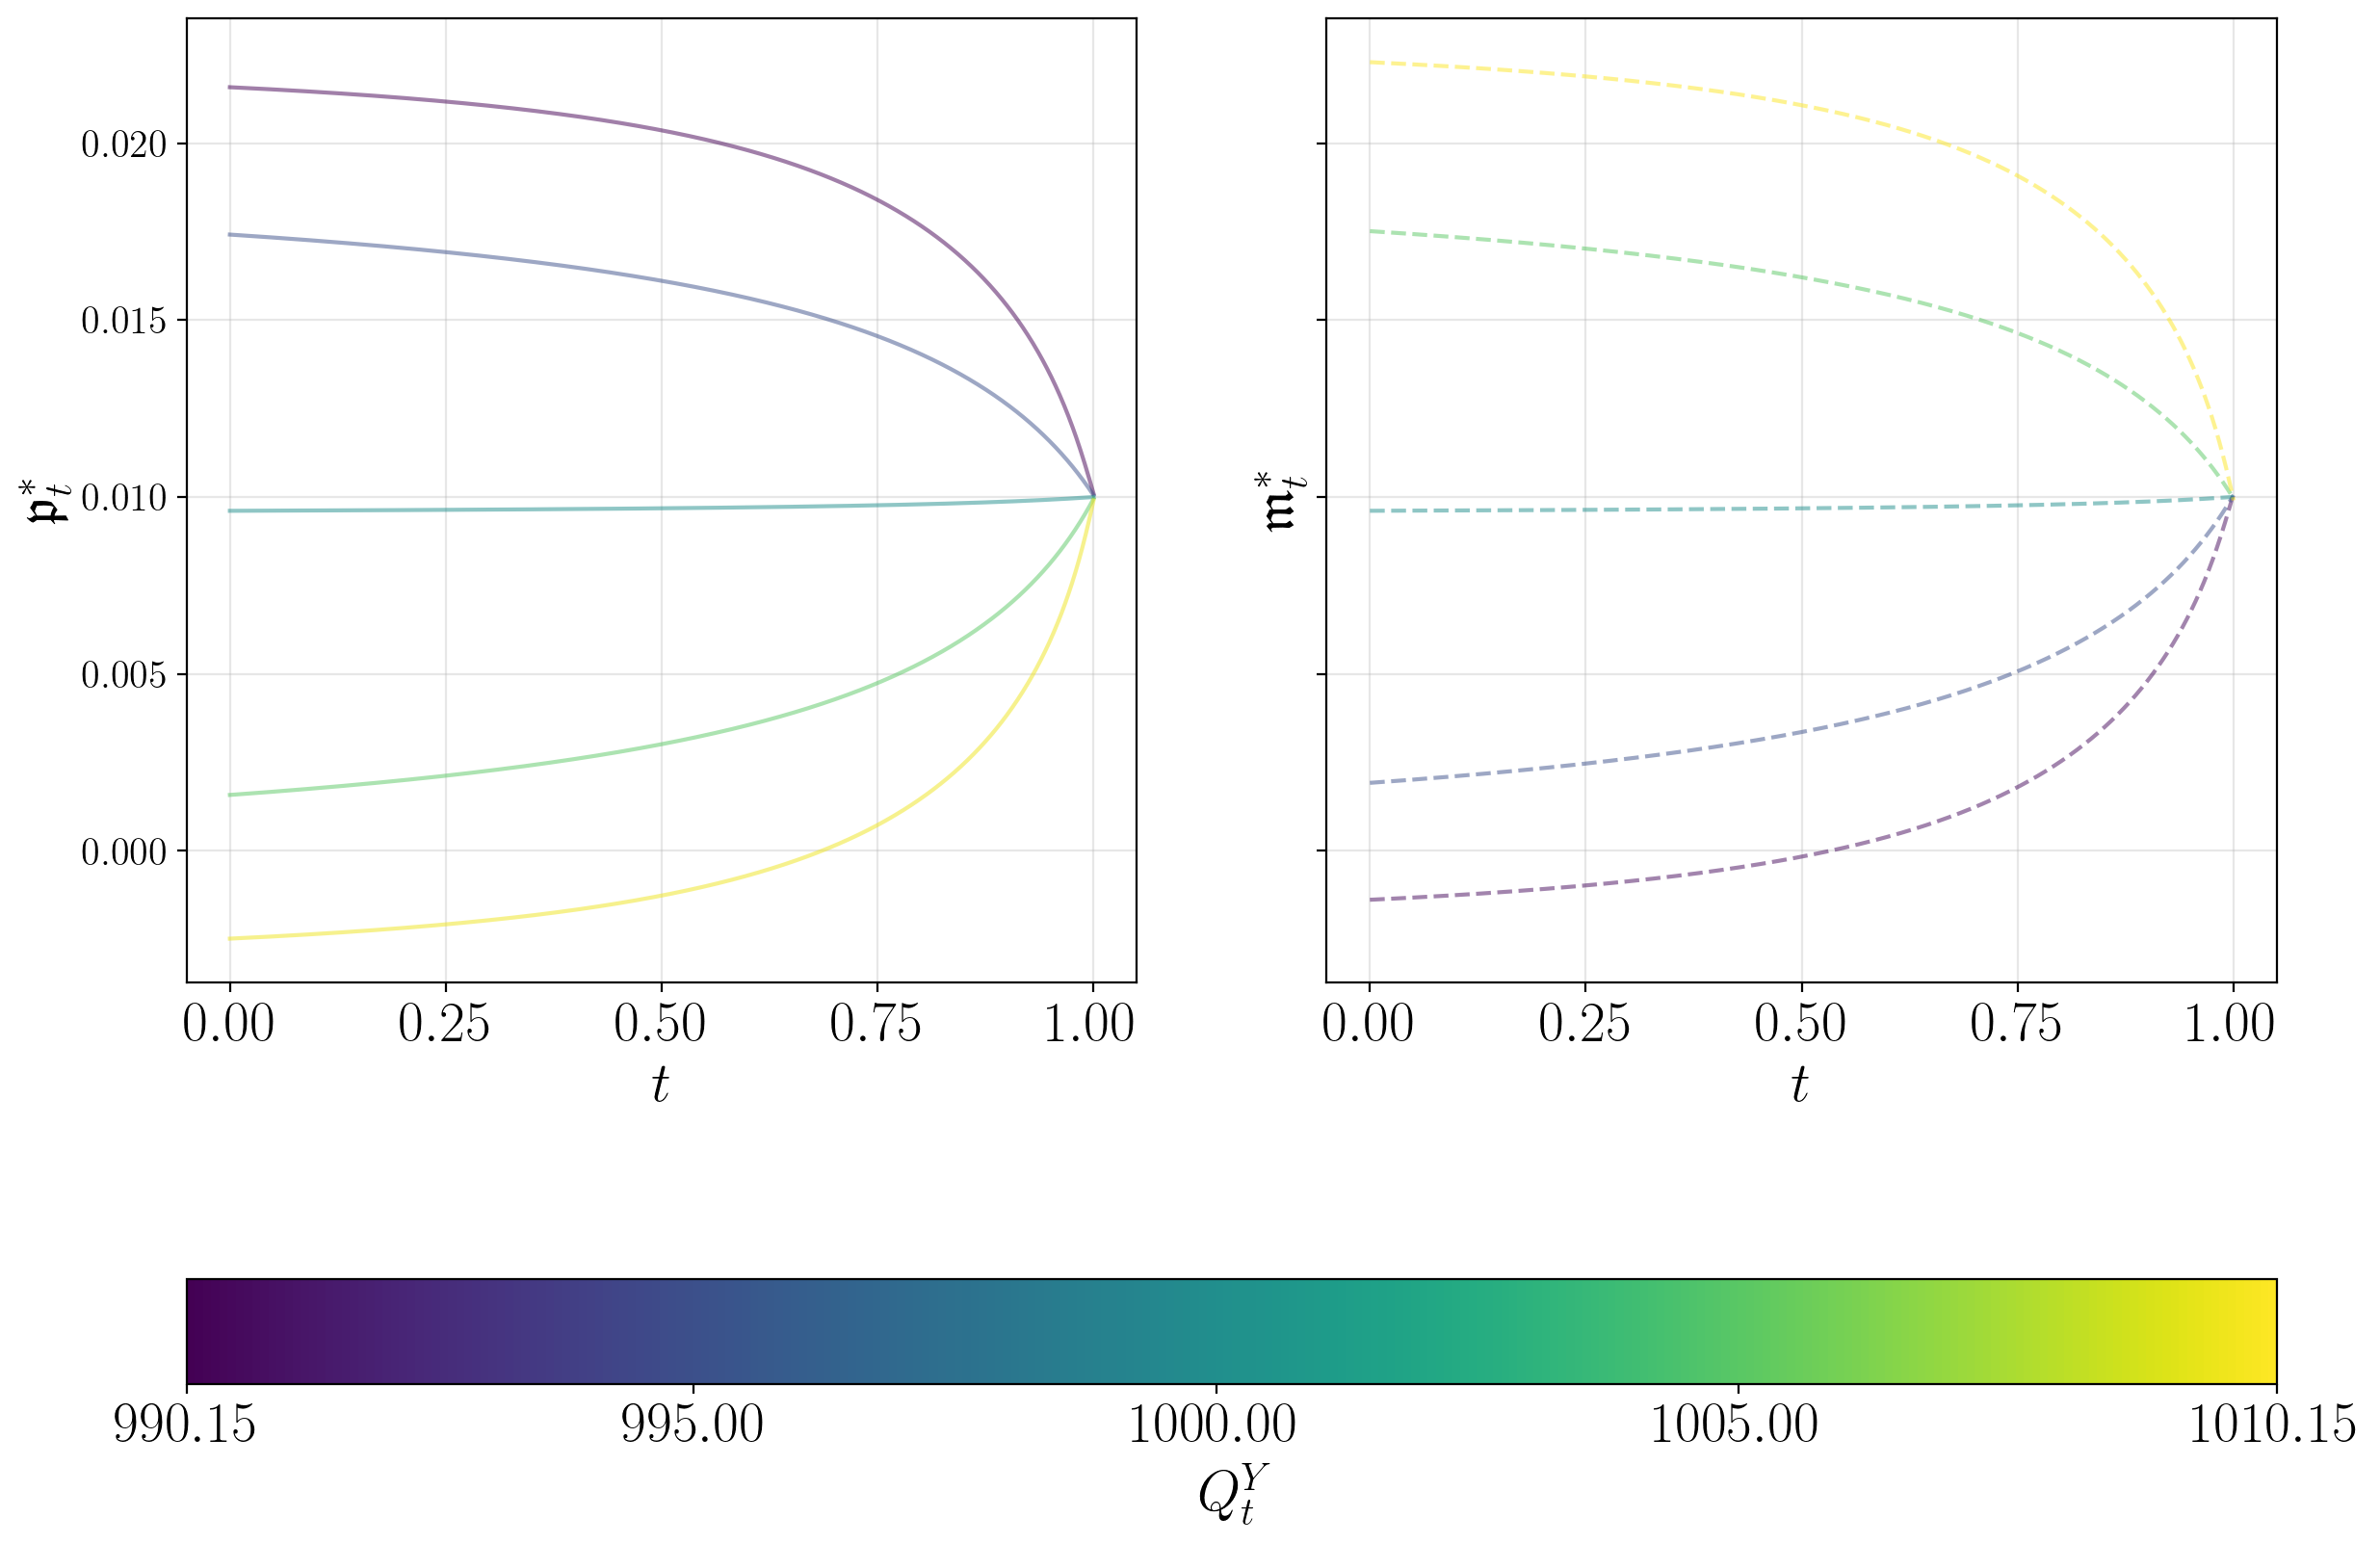

In [37]:
fig, ax = plt.subplots(1,2, figsize = (14,10), sharey=True)
value_p = [0,10,20,30,39]
value_m = [1,10,20,30,40]
for i,q in enumerate(value_p):
        color = cmap(norm(AMM.y_grid[q]))
        ax[0].plot(t_vector, p[q,:],'-', color = color, alpha = 0.5)#, label="q="+str(q), colors[iq])

    
for i,q in enumerate(value_m):
        color = cmap(norm(AMM.y_grid[q]))
        ax[1].plot(t_vector, m[q,:],'--', color = color, alpha = 0.5) #, label="q="+str(q), colors[iq])
        
ax[0].set_xlabel(r'$t$', fontsize = fs)
ax[1].set_xlabel(r'$t$', fontsize = fs)
ax[0].set_ylabel(r'$\mathfrak{p}^*_t$', fontsize = fs)
ax[1].set_ylabel(r'$\mathfrak{m}^*_t$', fontsize = fs)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)

ax[0].tick_params(axis='x', labelsize=fs)
ax[1].tick_params(axis='x', labelsize=fs)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2)
cbar.set_ticks([min(AMM.y_grid), 995, 1000, 1005, max(AMM.y_grid)])  # new
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'$Q^Y_t$', fontsize=fs)

#plt.tight_layout()
plt.savefig('figures/Optimal_fees_through_time_fct_of_Q_t.pdf', format="pdf", dpi=dpi)
plt.show()

# Fees as a function of time for k=0.1

In [38]:
params["kappa"] = 0.1
AMM = utils.first_approximation(**params)

In [39]:
Nt = 1000
t_vector = np.linspace(0, AMM.T,num=Nt)

p = np.ones((len(AMM.y_grid), len(t_vector)))
m = np.ones_like(p)

for i,t in enumerate(t_vector):
    p[:,i],m[:,i] = AMM._calculate_fees_t(t)

In [40]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin=min(AMM.y_grid), vmax=max(AMM.y_grid))
sm = ScalarMappable(norm=norm, cmap=cmap)

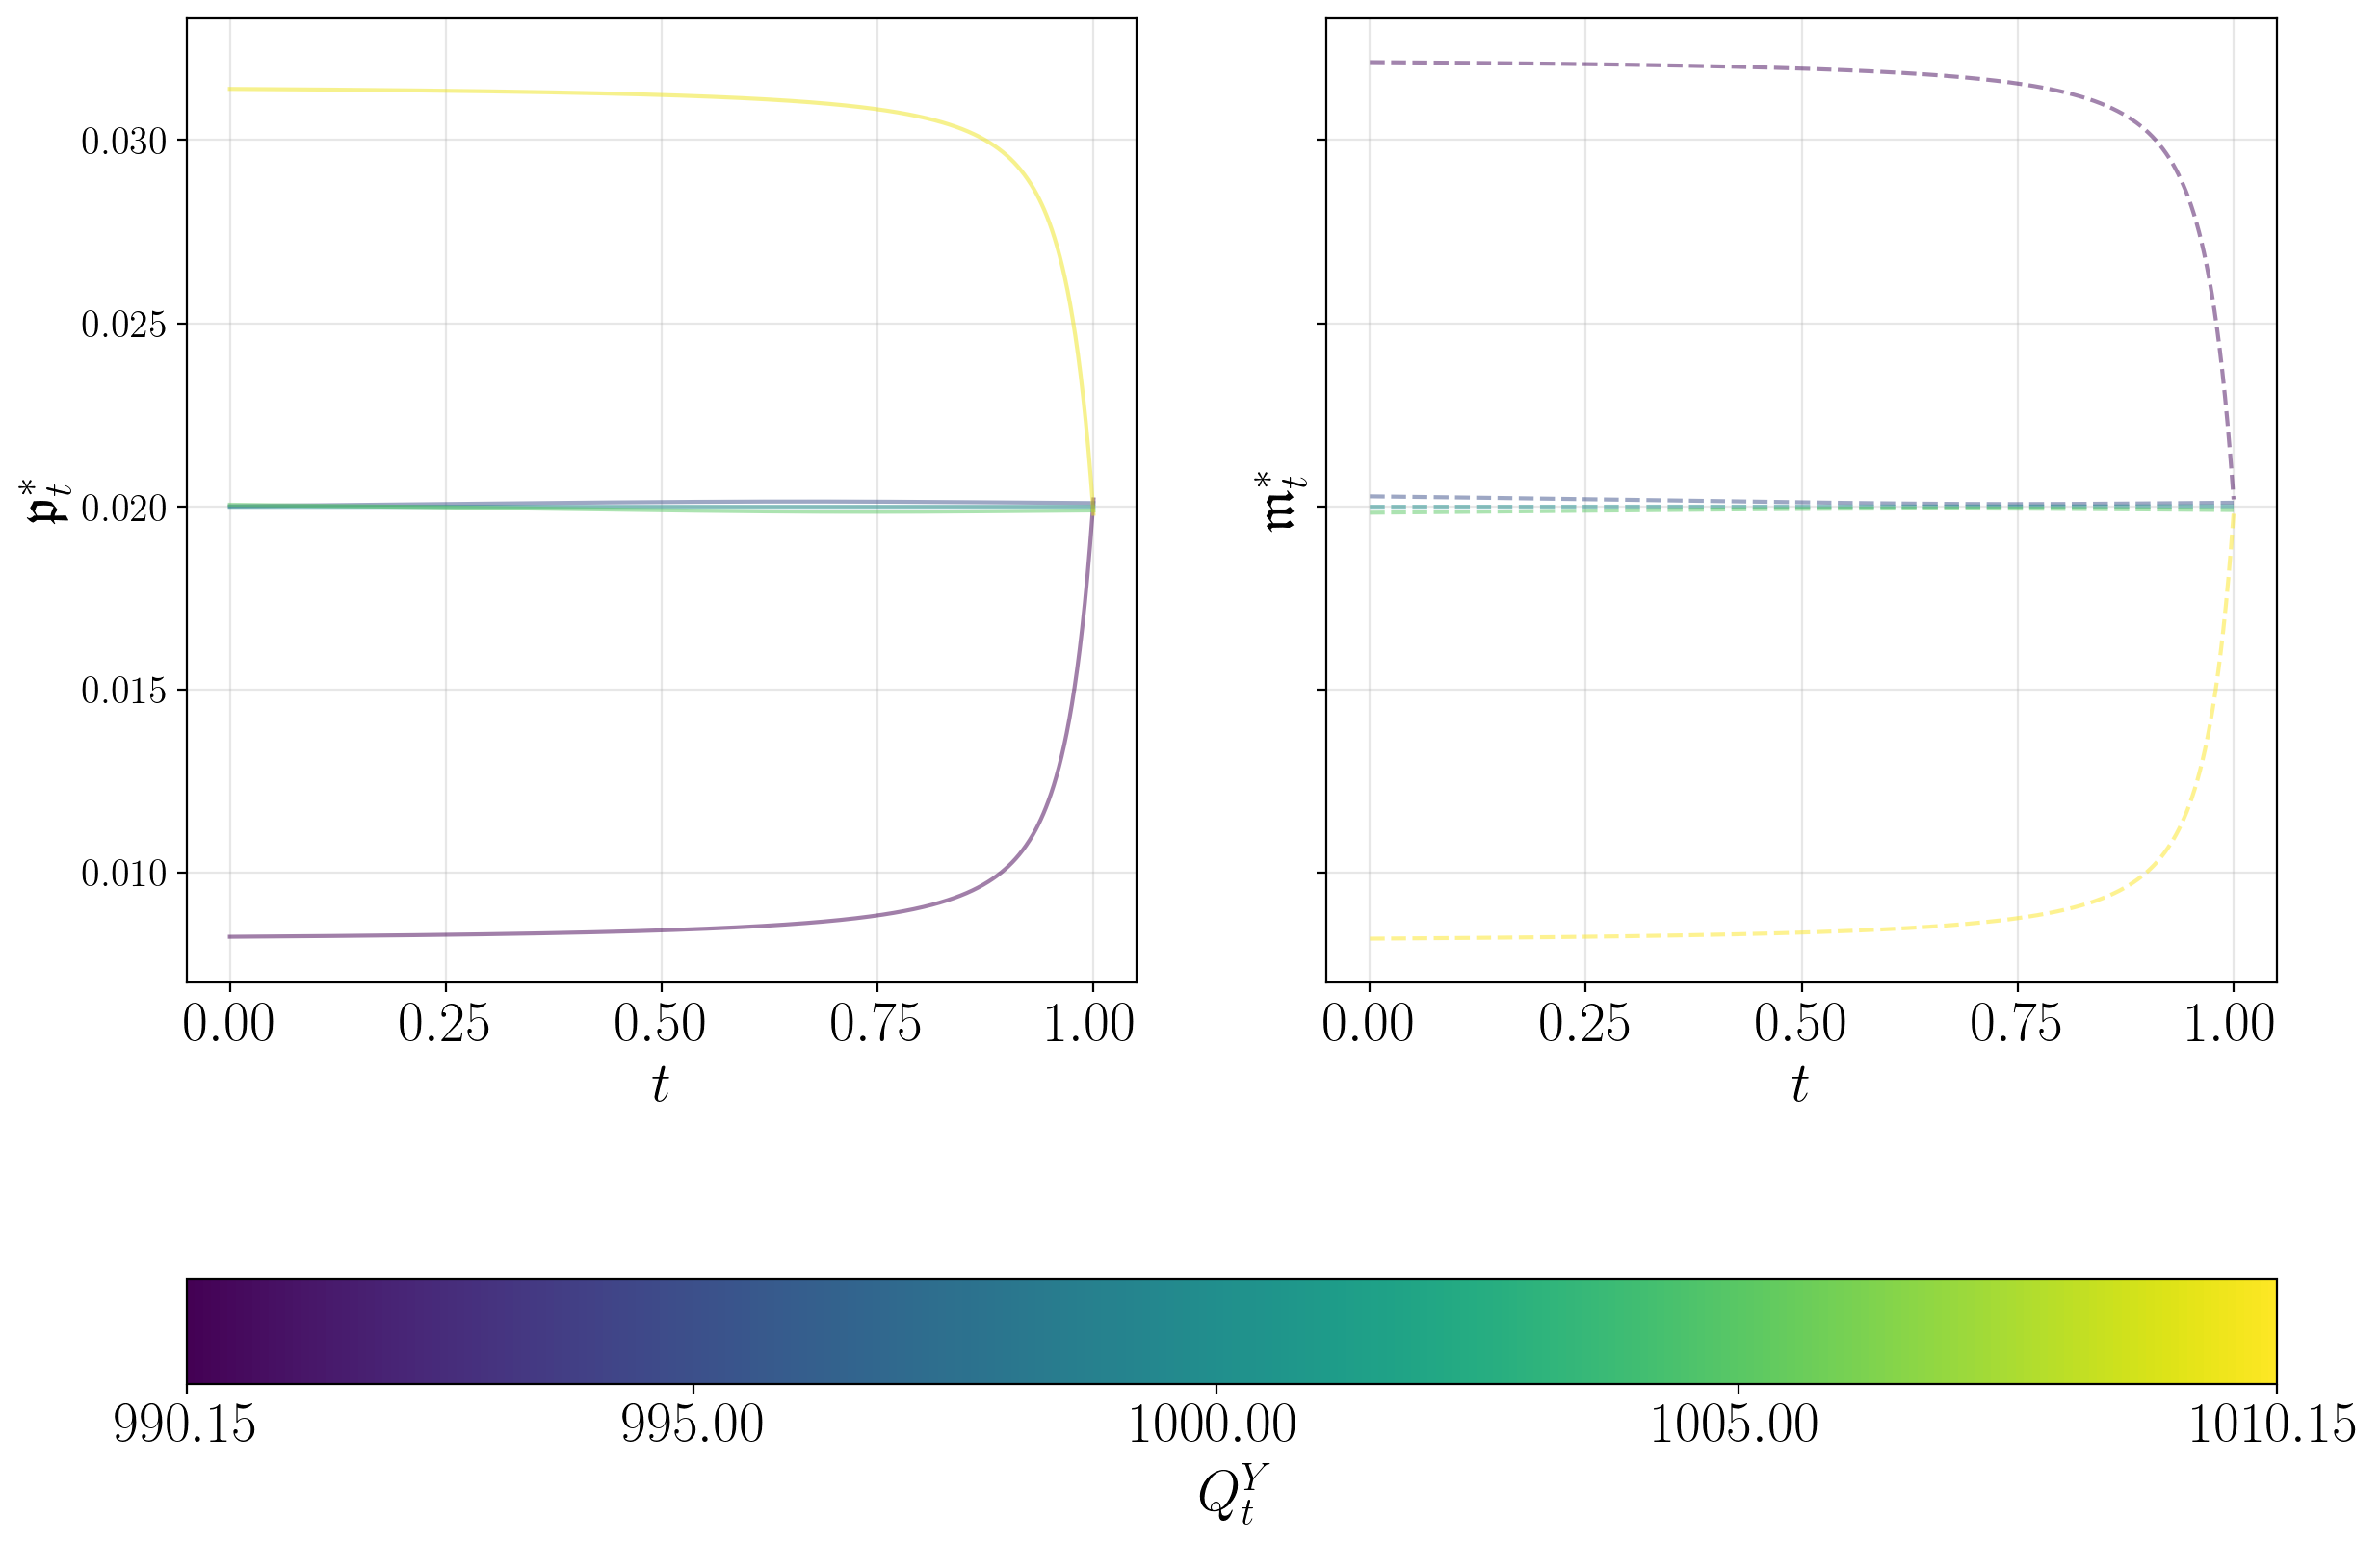

In [41]:
fig, ax = plt.subplots(1,2, figsize = (14,10), sharey=True)
value_p = [0,10,20,30,39]
value_m = [1,10,20,30,40]
for i,q in enumerate(value_p):
        color = cmap(norm(AMM.y_grid[q]))
        ax[0].plot(t_vector, AMM.kappa *p[q,:],'-', color = color, alpha = 0.5)#, label="q="+str(q), colors[iq])

    
for i,q in enumerate(value_m):
        color = cmap(norm(AMM.y_grid[q]))
        ax[1].plot(t_vector, AMM.kappa *m[q,:],'--', color = color, alpha = 0.5) #, label="q="+str(q), colors[iq])
        
ax[0].set_xlabel(r'$t$', fontsize = fs)
ax[1].set_xlabel(r'$t$', fontsize = fs)
ax[0].set_ylabel(r'$\mathfrak{p}^*_t$', fontsize = fs)
ax[1].set_ylabel(r'$\mathfrak{m}^*_t$', fontsize = fs)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)

ax[0].tick_params(axis='x', labelsize=fs)
ax[1].tick_params(axis='x', labelsize=fs)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.2)
cbar.set_ticks([min(AMM.y_grid), 995, 1000, 1005, max(AMM.y_grid)])  # new
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'$Q^Y_t$', fontsize=fs)

#plt.tight_layout()
plt.savefig('figures/Optimal_fees_through_time_fct_of_Q_t.k=0.1.pdf', format="pdf", dpi=dpi)
plt.show()

# Simulations of P&L.

In [42]:
nsims = 100_000
Nt = 1000
seed = 123

In [43]:
params["kappa"] = 2
params["int_sell"] = 100
params["int_buy"] = 100

In [44]:
AMM = utils.first_approximation(**params)

In [45]:
alpha, beta = AMM._calculate_fees_t(0.5)

In [46]:
c = np.round((alpha[20] + beta[20])/2,2)
c

0.01

In [47]:
(cash_Opt, _, n_sell_order_Opt, n_buy_order_Opt, traj_y_opt)= AMM.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed,  strategy = "Optimal", return_trajectory=True)
(cash_Lin, _, n_sell_order_Lin, n_buy_order_Lin, traj_y_lin)= AMM.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed,  strategy = "Linear", return_trajectory=True)
(cash_Const_c, _, n_sell_order_Const_c, n_buy_order_Const_c, traj_y_const_c)= AMM.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed, c=c, strategy = "Constant", return_trajectory=True)

In [48]:
Zopt = -AMM.der_level_fct(traj_y_opt)
Zlin = -AMM.der_level_fct(traj_y_lin)
Zcons_c = -AMM.der_level_fct(traj_y_const_c)

QVopt = np.sum(np.diff(Zopt,axis=1)**2,axis=1)
QVlin = np.sum(np.diff(Zlin,axis=1)**2,axis=1)
QVconst_c = np.sum(np.diff(Zcons_c,axis=1)**2,axis=1)

In [49]:
Fees = ["Optimal", "Linear", "Constant_c"]
Revenue = [np.mean(cash_Opt),np.mean(cash_Lin),np.mean(cash_Const_c)]
N_sell_order = [np.mean(n_sell_order_Opt),np.mean(n_sell_order_Lin),np.mean(n_sell_order_Const_c)]
N_buy_order = [np.mean(n_buy_order_Opt),np.mean(n_buy_order_Lin),np.mean(n_buy_order_Const_c)]
Q_var = [np.mean(QVopt),np.mean(QVlin),np.mean(QVconst_c)]

In [50]:
df = pd.DataFrame({
    "type of fees": Fees,
    "collected fees": np.round(Revenue,2),
    "sell orders": np.round(N_sell_order,2),
    "buy orders": np.round(N_buy_order,2),
    "quadratic variation": np.round(Q_var,2),
})

In [51]:
df

type of fees  collected fees  sell orders  buy orders  quadratic variation
0      Optimal           35.55        35.89       35.91                 0.69
1       Linear           35.55        35.88       35.91                 0.69
2   Constant_c           35.16        35.15       35.16                 0.68

# Second Approximation

In [52]:
y_grid = np.array([990 + i*0.5 for i in range(0,41)])

In [53]:
params["kappa"] = 2
params["int_sell"] = 50
params["int_buy"] = 50
params["y_grid"] = y_grid

In [54]:
reload(utils)

<module 'src.utils' from '/Users/leonardobaggiani/Desktop/GitHub/amm-fees/src/utils.py'>

In [55]:
lin_quad = utils.second_approximation(**params)

In [56]:
p,m = lin_quad._calculate_fees_t(0.5,100)
p[-1] = np.nan
m[0] = np.nan

In [57]:
AMM = utils.first_approximation(**params)
fp,fm = AMM._calculate_fees_t(0.5)
fp[-1] = np.nan
fm[0] = np.nan

# Optimal fees as a function of quantity

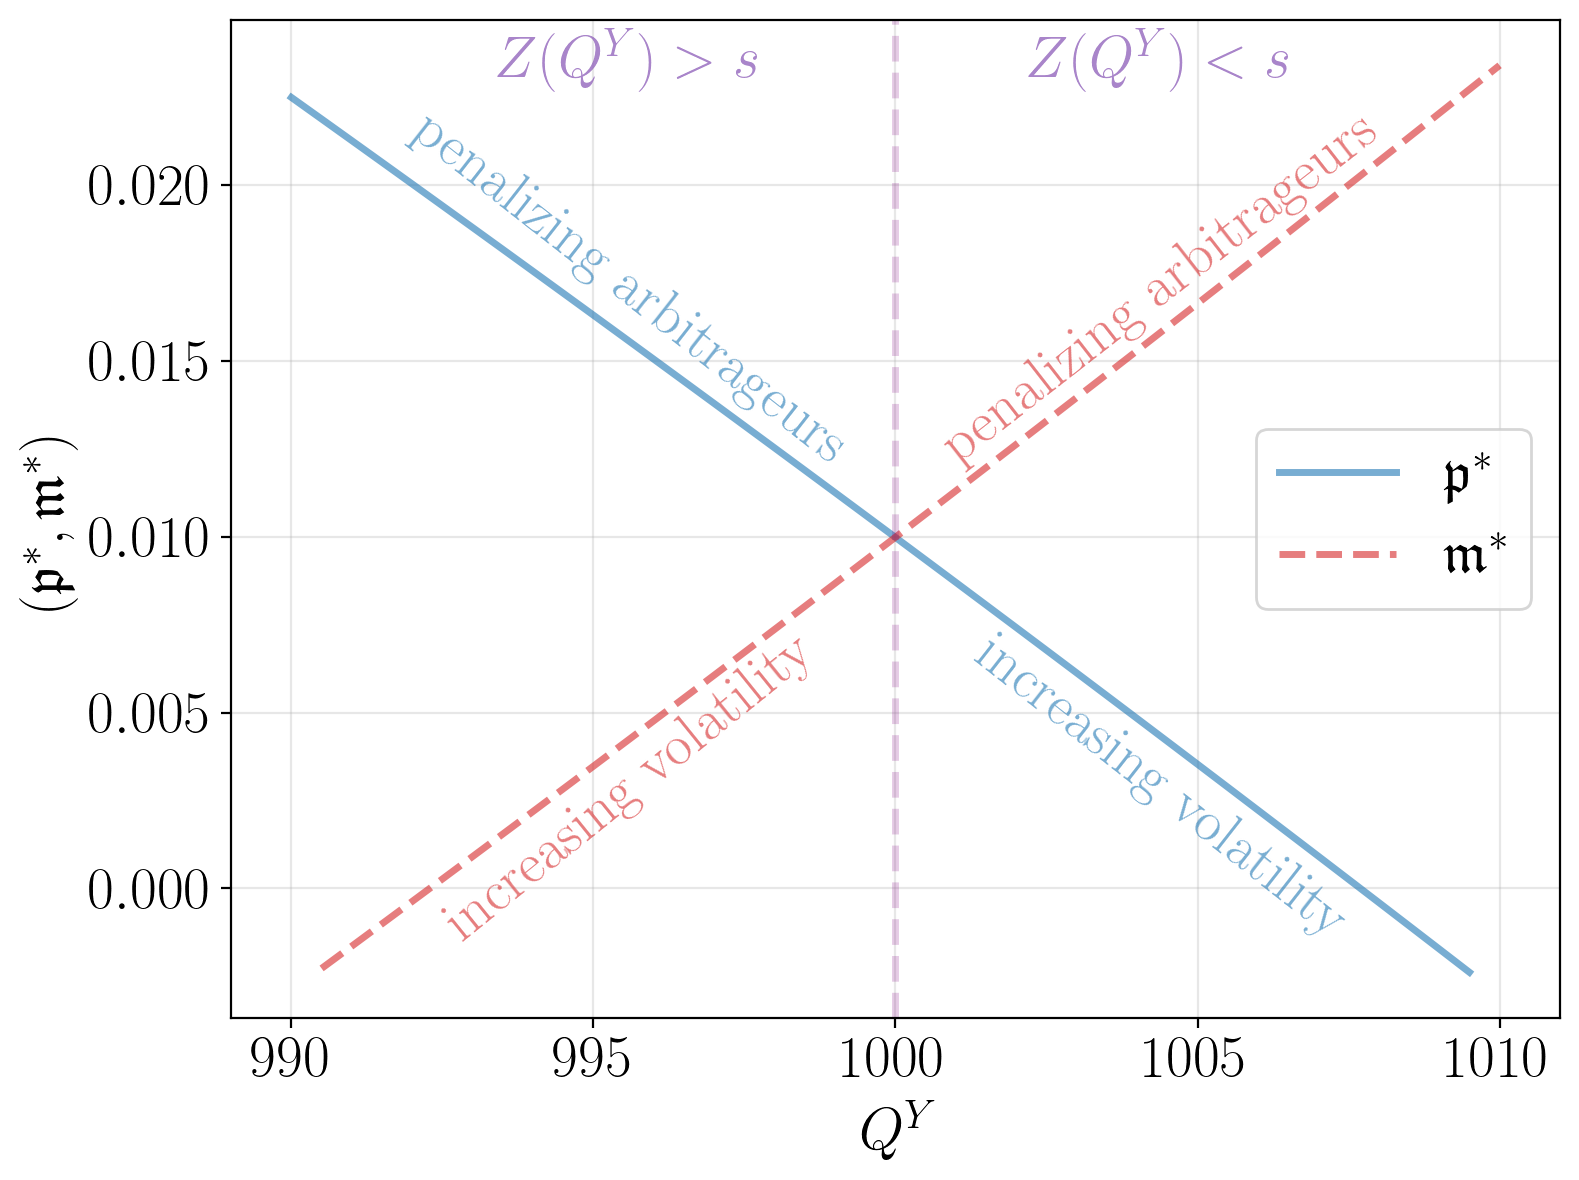

In [58]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(lin_quad.y_grid, p[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(lin_quad.y_grid, m[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*$', color='tab:red', alpha=0.6)


ax.axvline(x=lin_quad.y_0, color='purple', linestyle='--', linewidth=2.5, alpha=0.2)
ax.text(0.3, 0.96, r"$Z(Q^{Y}) > s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)
ax.text(0.7,0.96, r"$Z(Q^{Y}) < s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)

ax.text(0.3, 0.73, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.7, 0.73, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:red',alpha=0.6, rotation = theta_deg_m)
ax.text(0.7, 0.23, r"$\mathrm{increasing}~\mathrm{volatility}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.3, 0.23, r"$\mathrm{increasing}~\mathrm{volatility}$", 
        transform=ax.transAxes, fontsize=fs, ha='center', va='center', 
        color='tab:red', alpha=0.6, rotation=theta_deg_m + 1)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(lin_quad.y_grid.min(),0), round(lin_quad.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approx.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees (first approx vs second approx) as a function of quantity

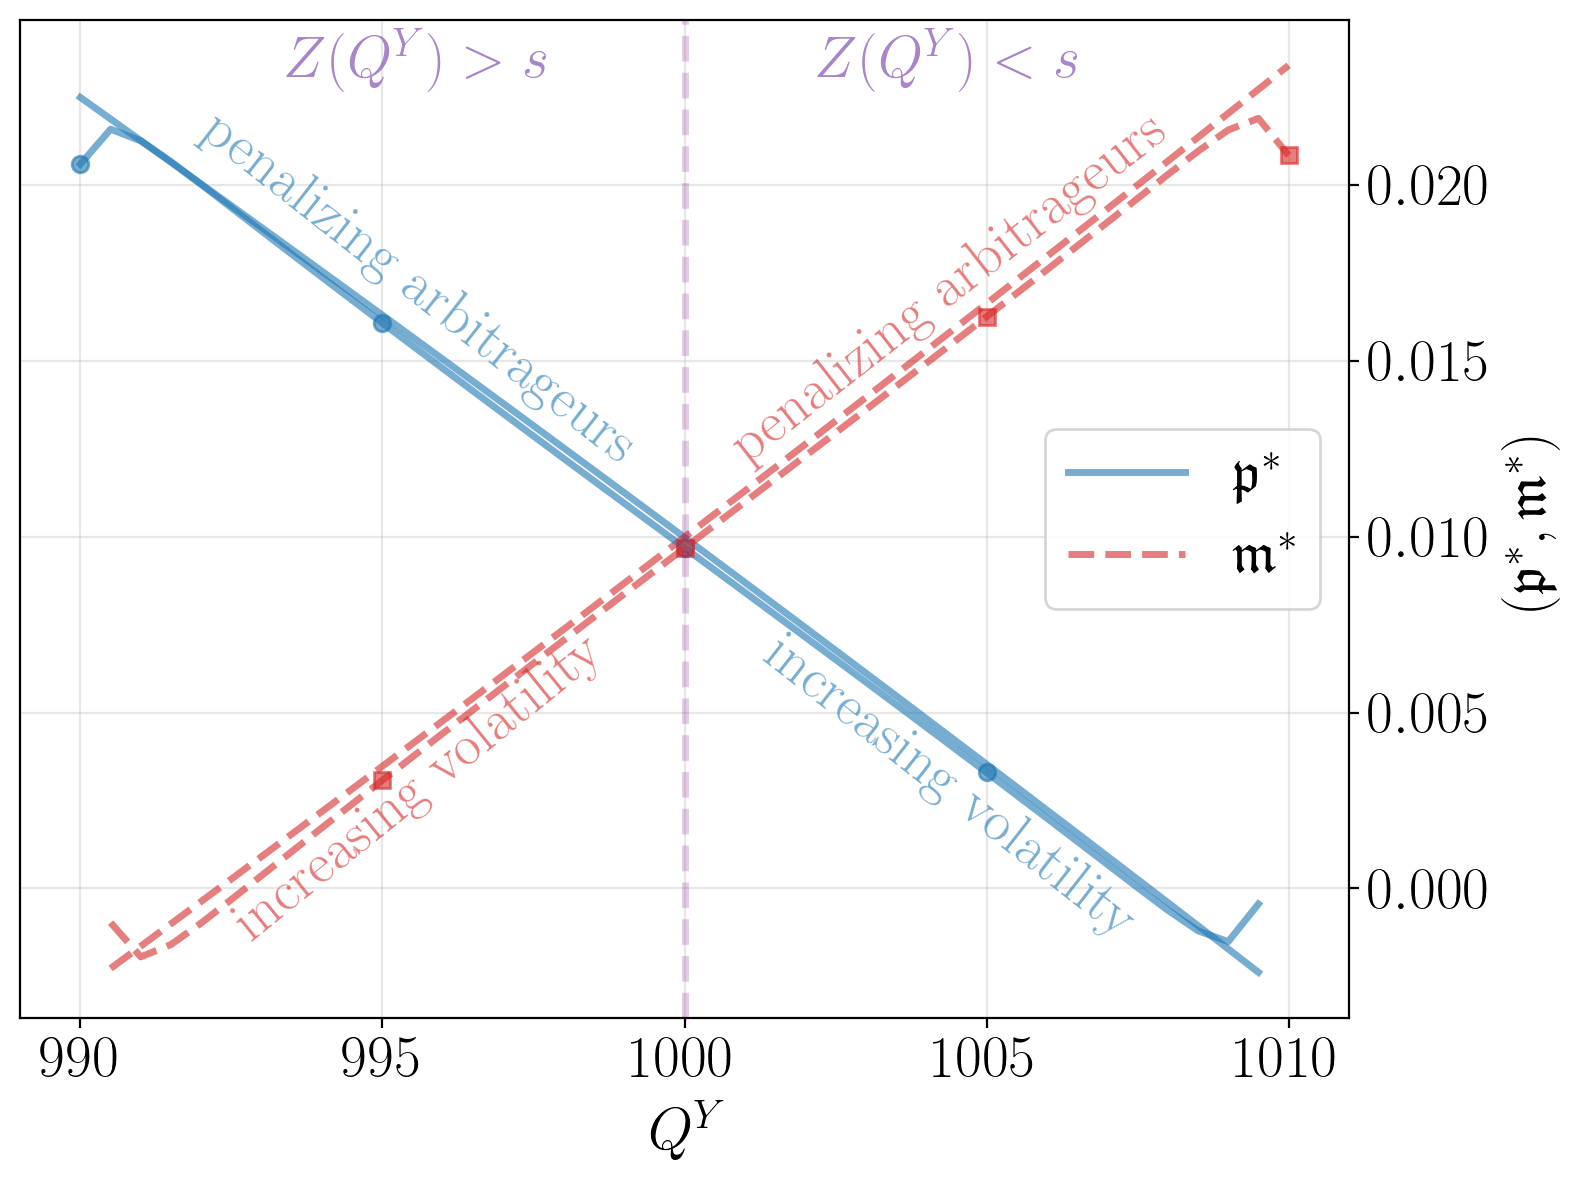

In [59]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(lin_quad.y_grid, p[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(lin_quad.y_grid, m[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*$', color='tab:red', alpha=0.6)

ax.yaxis.tick_right()  
ax.yaxis.set_label_position("right") 

# Add markers to p and m
ax.plot(lin_quad.y_grid, fp[:], '-', linewidth = 2.5, 
        color='tab:blue', alpha=0.6, marker='o', markevery=10, markersize=6)
ax.plot(lin_quad.y_grid, fm[:], '--', linewidth = 2.5,
        color='tab:red', alpha=0.6, marker='s', markevery=10, markersize=6)

ax.axvline(x=lin_quad.y_0, color='purple', linestyle='--', linewidth=2.5, alpha=0.2)
ax.text(0.3, 0.96, r"$Z(Q^{Y}) > s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)
ax.text(0.7, 0.96, r"$Z(Q^{Y}) < s$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:purple',alpha=0.8)

ax.text(0.3, 0.73, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.7, 0.73, r"$\mathrm{penalizing}~\mathrm{arbitrageurs}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:red',alpha=0.6, rotation = theta_deg_m)
ax.text(0.7, 0.23, r"$\mathrm{increasing}~\mathrm{volatility}$", transform=ax.transAxes, fontsize=fs, ha='center', va='center',color='tab:blue',alpha=0.6, rotation = theta_deg_p)
ax.text(0.3, 0.23, r"$\mathrm{increasing}~\mathrm{volatility}$", 
        transform=ax.transAxes, fontsize=fs, ha='center', va='center', 
        color='tab:red', alpha=0.6, rotation=theta_deg_m + 1)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(lin_quad.y_grid.min(), 0), round(lin_quad.y_grid.max(), 0), 5), fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approxvsfirstapprox.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of quantity k = 0.25

In [90]:
params["kappa"] = 0.25
lin_quad = utils.second_approximation(**params)

In [91]:
p,m = lin_quad._calculate_fees_t(0.5,100)
p[-1] = np.nan
m[0] = np.nan

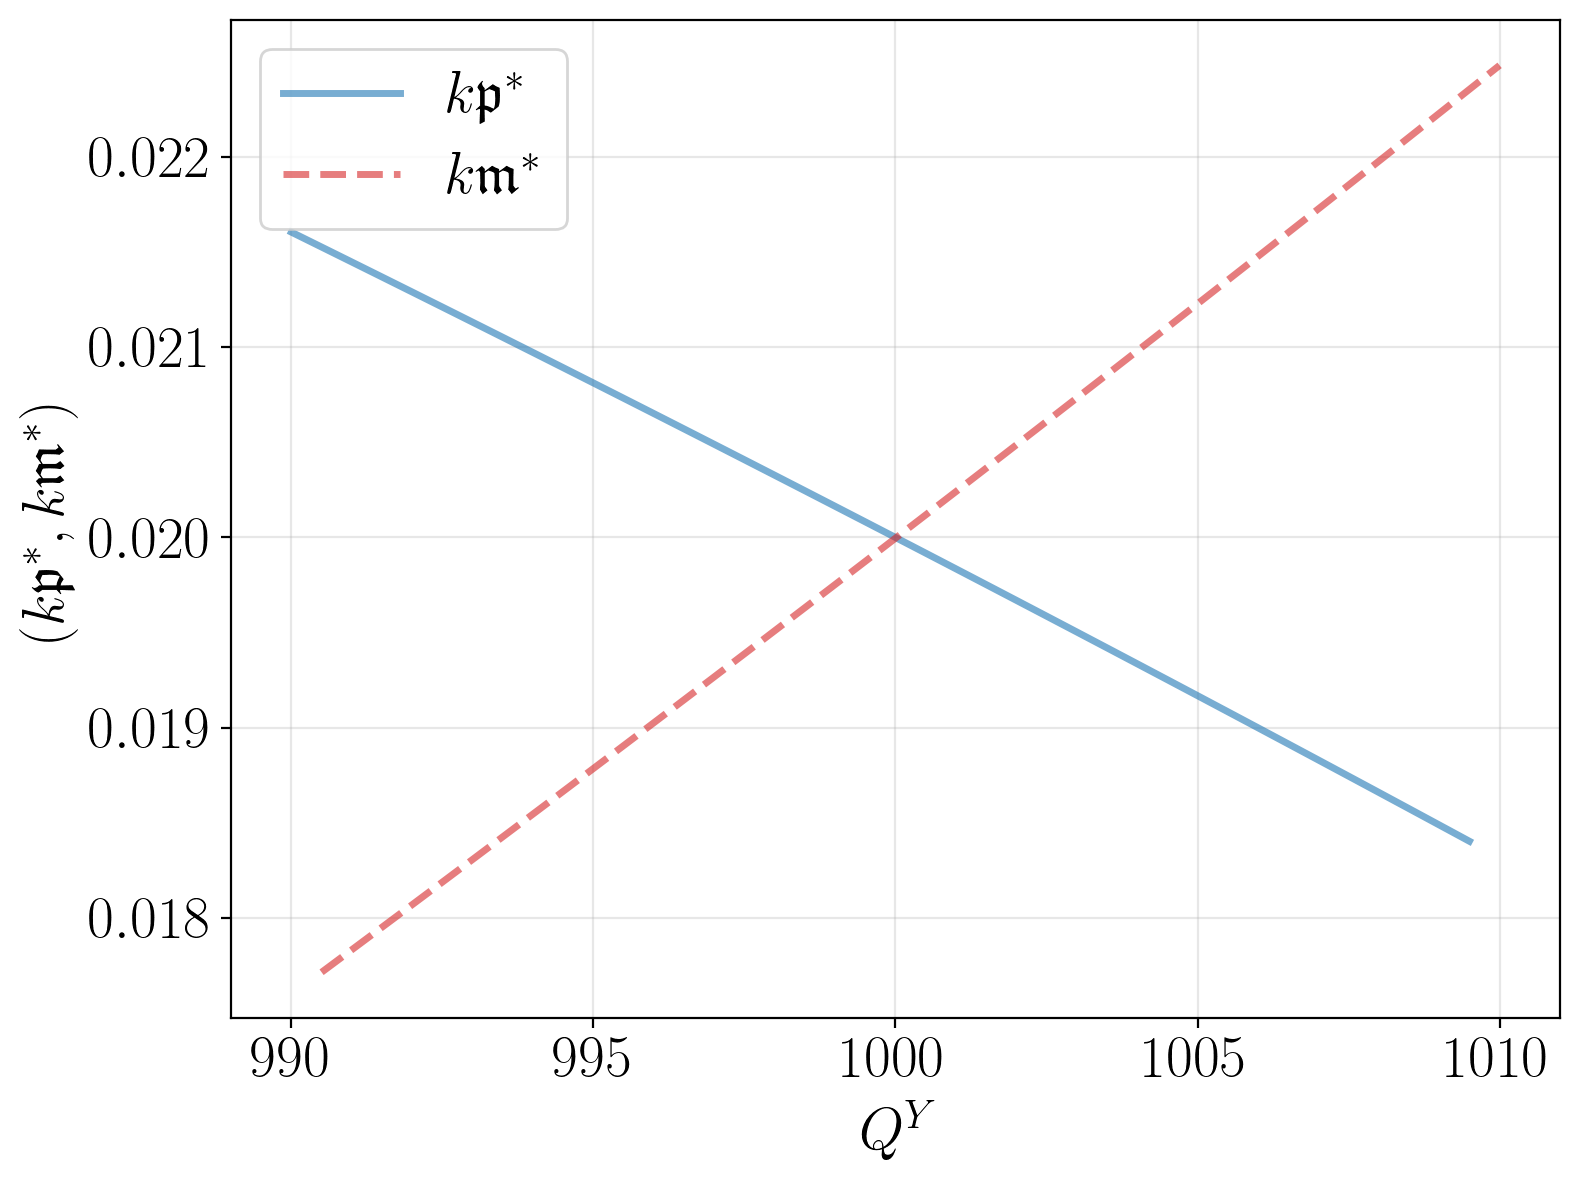

In [92]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(lin_quad.y_grid, lin_quad.kappa*p[:], '-', linewidth = 2.5, label = r'$k\mathfrak{p}^*$' , color='tab:blue', alpha=0.6)
ax.plot(lin_quad.y_grid, lin_quad.kappa*m[:], '--', linewidth = 2.5, label = r'$k\mathfrak{m}^*$', color='tab:red', alpha=0.6)




plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(lin_quad.y_grid.min(),0), round(lin_quad.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(k\mathfrak{p}^*, k\mathfrak{m}^*)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approx_k=0.25.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal Fees second approximation $k \to 0$.

In [93]:
p,m= lin_quad._calculate_fees_t_k0(0.5,100)
p[-1]= np.nan
m[0] = np.nan

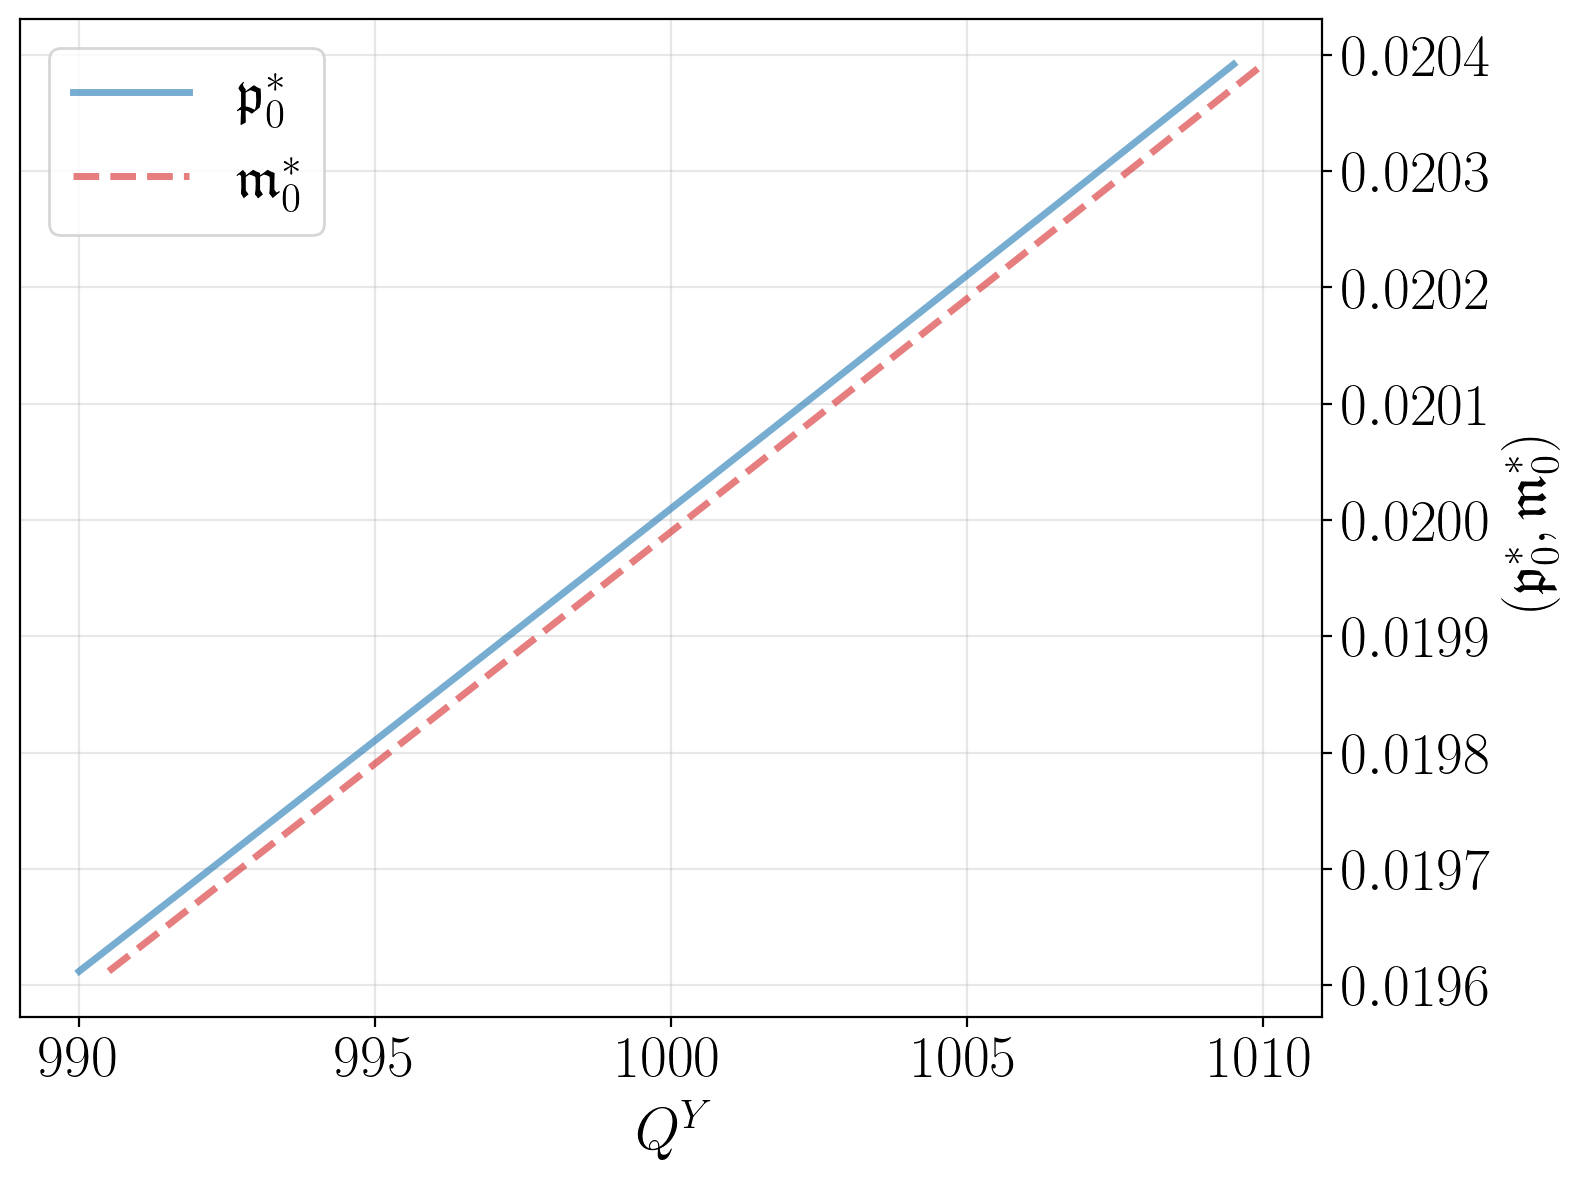

In [95]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

ax.plot(lin_quad.y_grid, p[:], '-', linewidth = 2.5, label = r'$\mathfrak{p}^*_0$' , color='tab:blue', alpha=0.6)
ax.plot(lin_quad.y_grid, m[:], '--', linewidth = 2.5, label = r'$\mathfrak{m}^*_0$', color='tab:red', alpha=0.6)


ax.yaxis.tick_right()  
ax.yaxis.set_label_position("right") 

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(np.linspace(round(lin_quad.y_grid.min(),0), round(lin_quad.y_grid.max(),0), 5),fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*_0, \mathfrak{m}^*_0)$', fontsize=fs)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approx_k=0.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of penalty.

In [65]:
pen_const_value = np.array([0,50,100])
params["kappa"] = 2

In [66]:
p = np.ones((len(AMM.y_grid), len(pen_const_value)))
m = np.ones_like(p)
for i, pen_const in enumerate(pen_const_value):
    params["pen_const"] = pen_const
    lin_quad = utils.second_approximation(**params)
    p[:,i], m[:,i] = lin_quad._calculate_fees_t(0.5,100)
    p[-1,i] = np.nan
    m[0:i] = np.nan

In [67]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin = min(pen_const_value), vmax = max(pen_const_value))
sm = ScalarMappable(norm = norm, cmap=cmap)

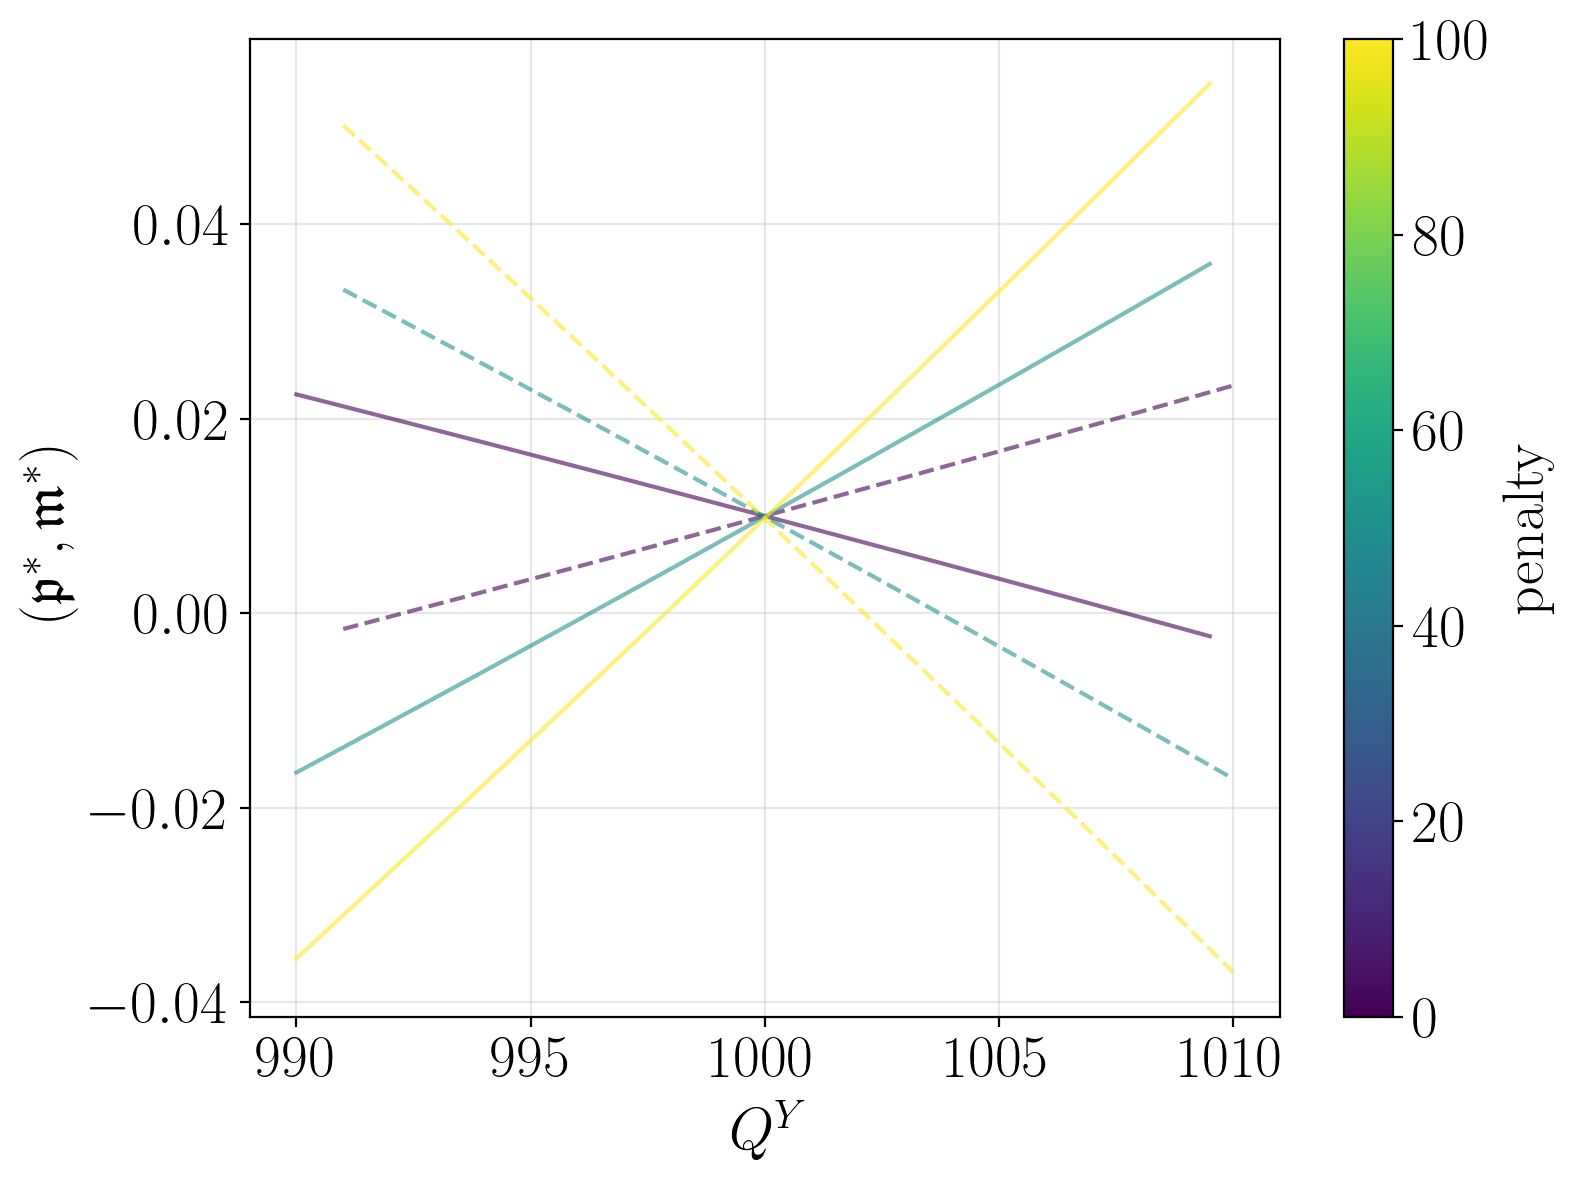

In [68]:
fig, ax = plt.subplots(1, 1, figsize = (8,6), sharey=False, sharex=True)

for i,pen in enumerate(pen_const_value):
    color = cmap(norm(pen_const_value[i]))
    ax.plot(AMM.y_grid, p[:,i], '-', color=color, alpha=0.6)
    ax.plot(AMM.y_grid, m[:,i], '--', color=color, alpha=0.6)


plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(),0), round(AMM.y_grid.max(),0), 5),fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)

cbar = fig.colorbar(sm, ax = ax, orientation = "vertical")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"$\mathrm{penalty}$", fontsize=fs)

plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approx_func_of_pen.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal fees as a function of $S_{t}$.

In [69]:
params["pen_const"] = 0
lin_quad = utils.second_approximation(**params)
St = np.array([98,99,100,101,102])

In [70]:
p = np.ones((len(St), lin_quad.dim))
m = np.ones_like(p)
for i,s in enumerate(St):
    p[i,:],m[i,:] = lin_quad._calculate_fees_t(0.5,s)
    p[i,-1] = np.nan
    m[i,0] = np.nan

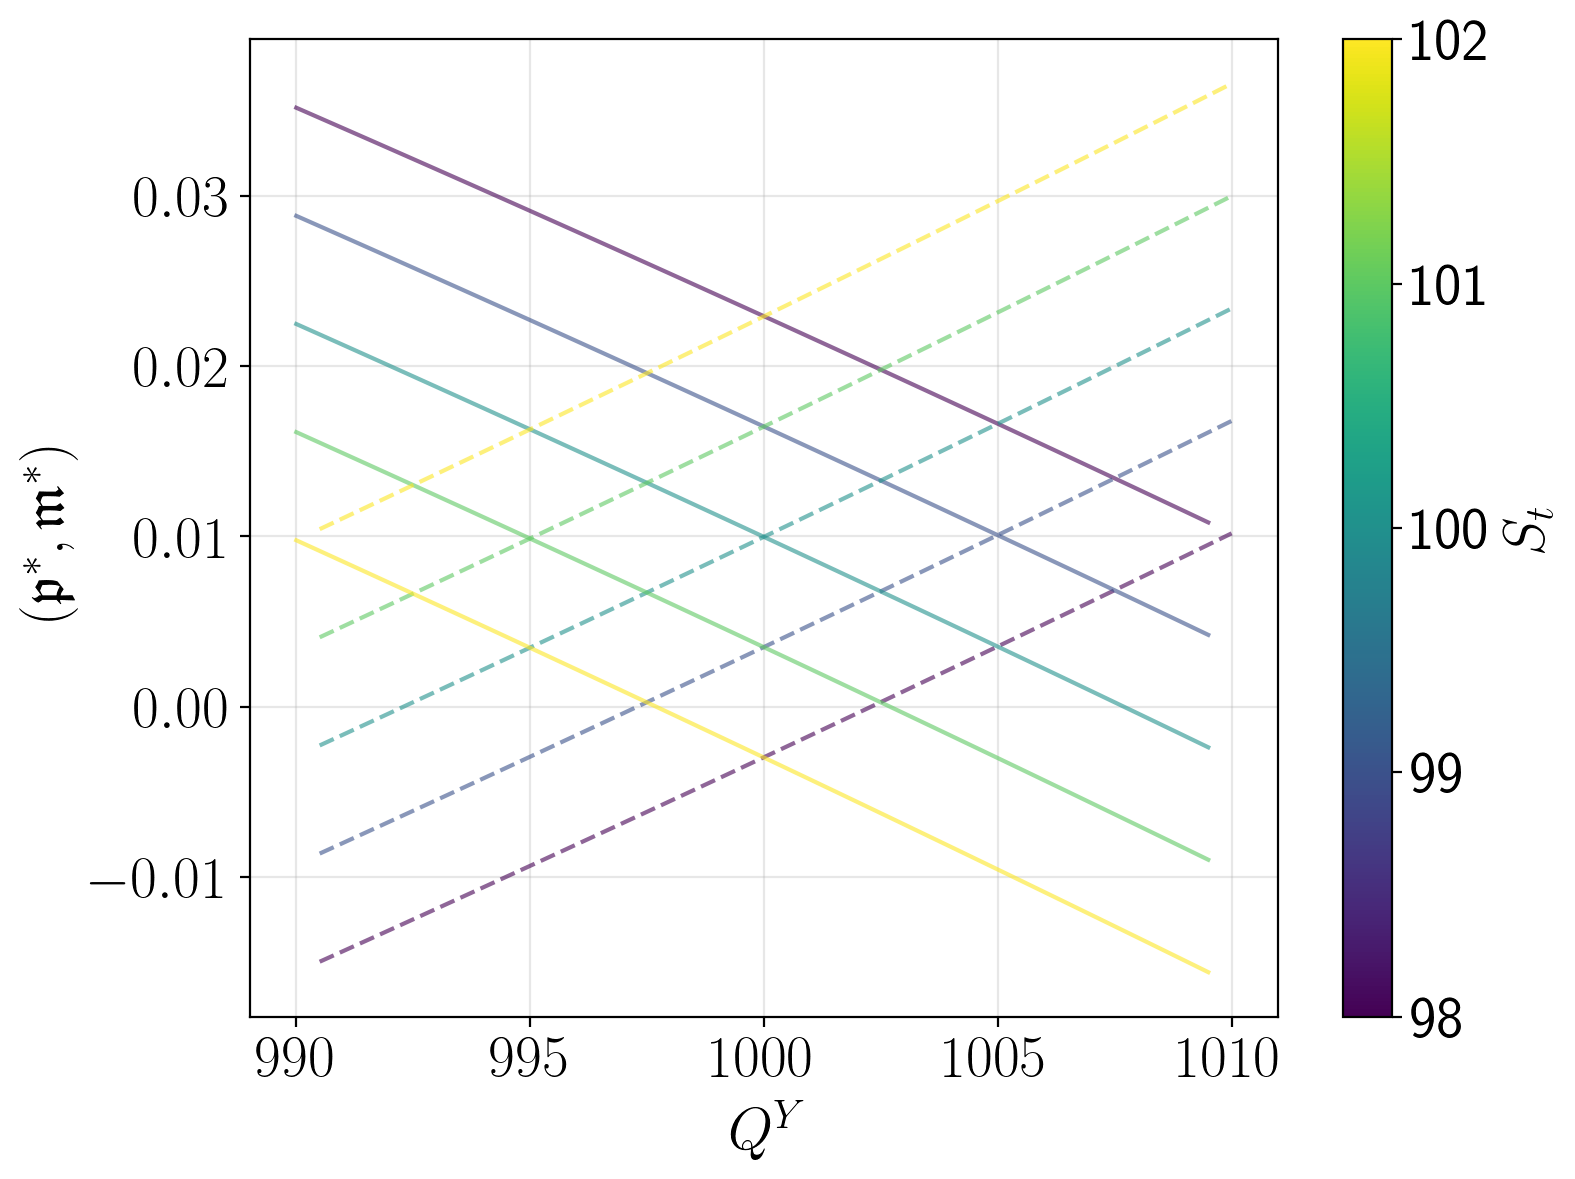

In [71]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin = min(St), vmax = max(St))
sm = ScalarMappable(norm = norm, cmap=cmap)


cmap = plt.get_cmap("viridis")
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])


fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=False, sharex=True)

for i, pen in enumerate(St):
    color = cmap(norm(St[i]))
    ax.plot(AMM.y_grid, p[i, :], '-', color=color, alpha=0.6)
    ax.plot(AMM.y_grid, m[i, :], '--', color=color, alpha=0.6)

plt.grid(alpha=0.3)
plt.xlabel(r'$Q^Y$', fontsize=fs)
plt.xticks(np.linspace(round(AMM.y_grid.min(), 0), round(AMM.y_grid.max(), 0), 5), fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel(r'$(\mathfrak{p}^*, \mathfrak{m}^*)$', fontsize=fs)

cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r"$S_t$", fontsize=fs)
cbar.set_ticks(St)
cbar.set_ticklabels([str(s) for s in St])

plt.tight_layout()
plt.savefig('figures/Optimal_Fees_on_quantity_lin_quadratic_approx_func_of_S.pdf', format="pdf", dpi=dpi)
plt.show()

# Optimal Fees as a function of time

In [72]:
lin_quad = utils.second_approximation(**params)

In [73]:
Nt = 1000
t_vector = np.linspace(0, lin_quad.T, num=Nt +1)

p = np.ones((len(lin_quad.y_grid), len(t_vector)))
m = np.ones_like(p)

for i, t in enumerate(t_vector):
    p[:, i], m[:, i] = lin_quad._calculate_fees_t(t, 100)
    p[-1, i] = np.nan
    m[0, i] = np.nan

In [74]:
cmap = plt.get_cmap("viridis")

norm = Normalize(vmin=min(AMM.y_grid), vmax=max(AMM.y_grid))
sm = ScalarMappable(norm=norm, cmap=cmap)

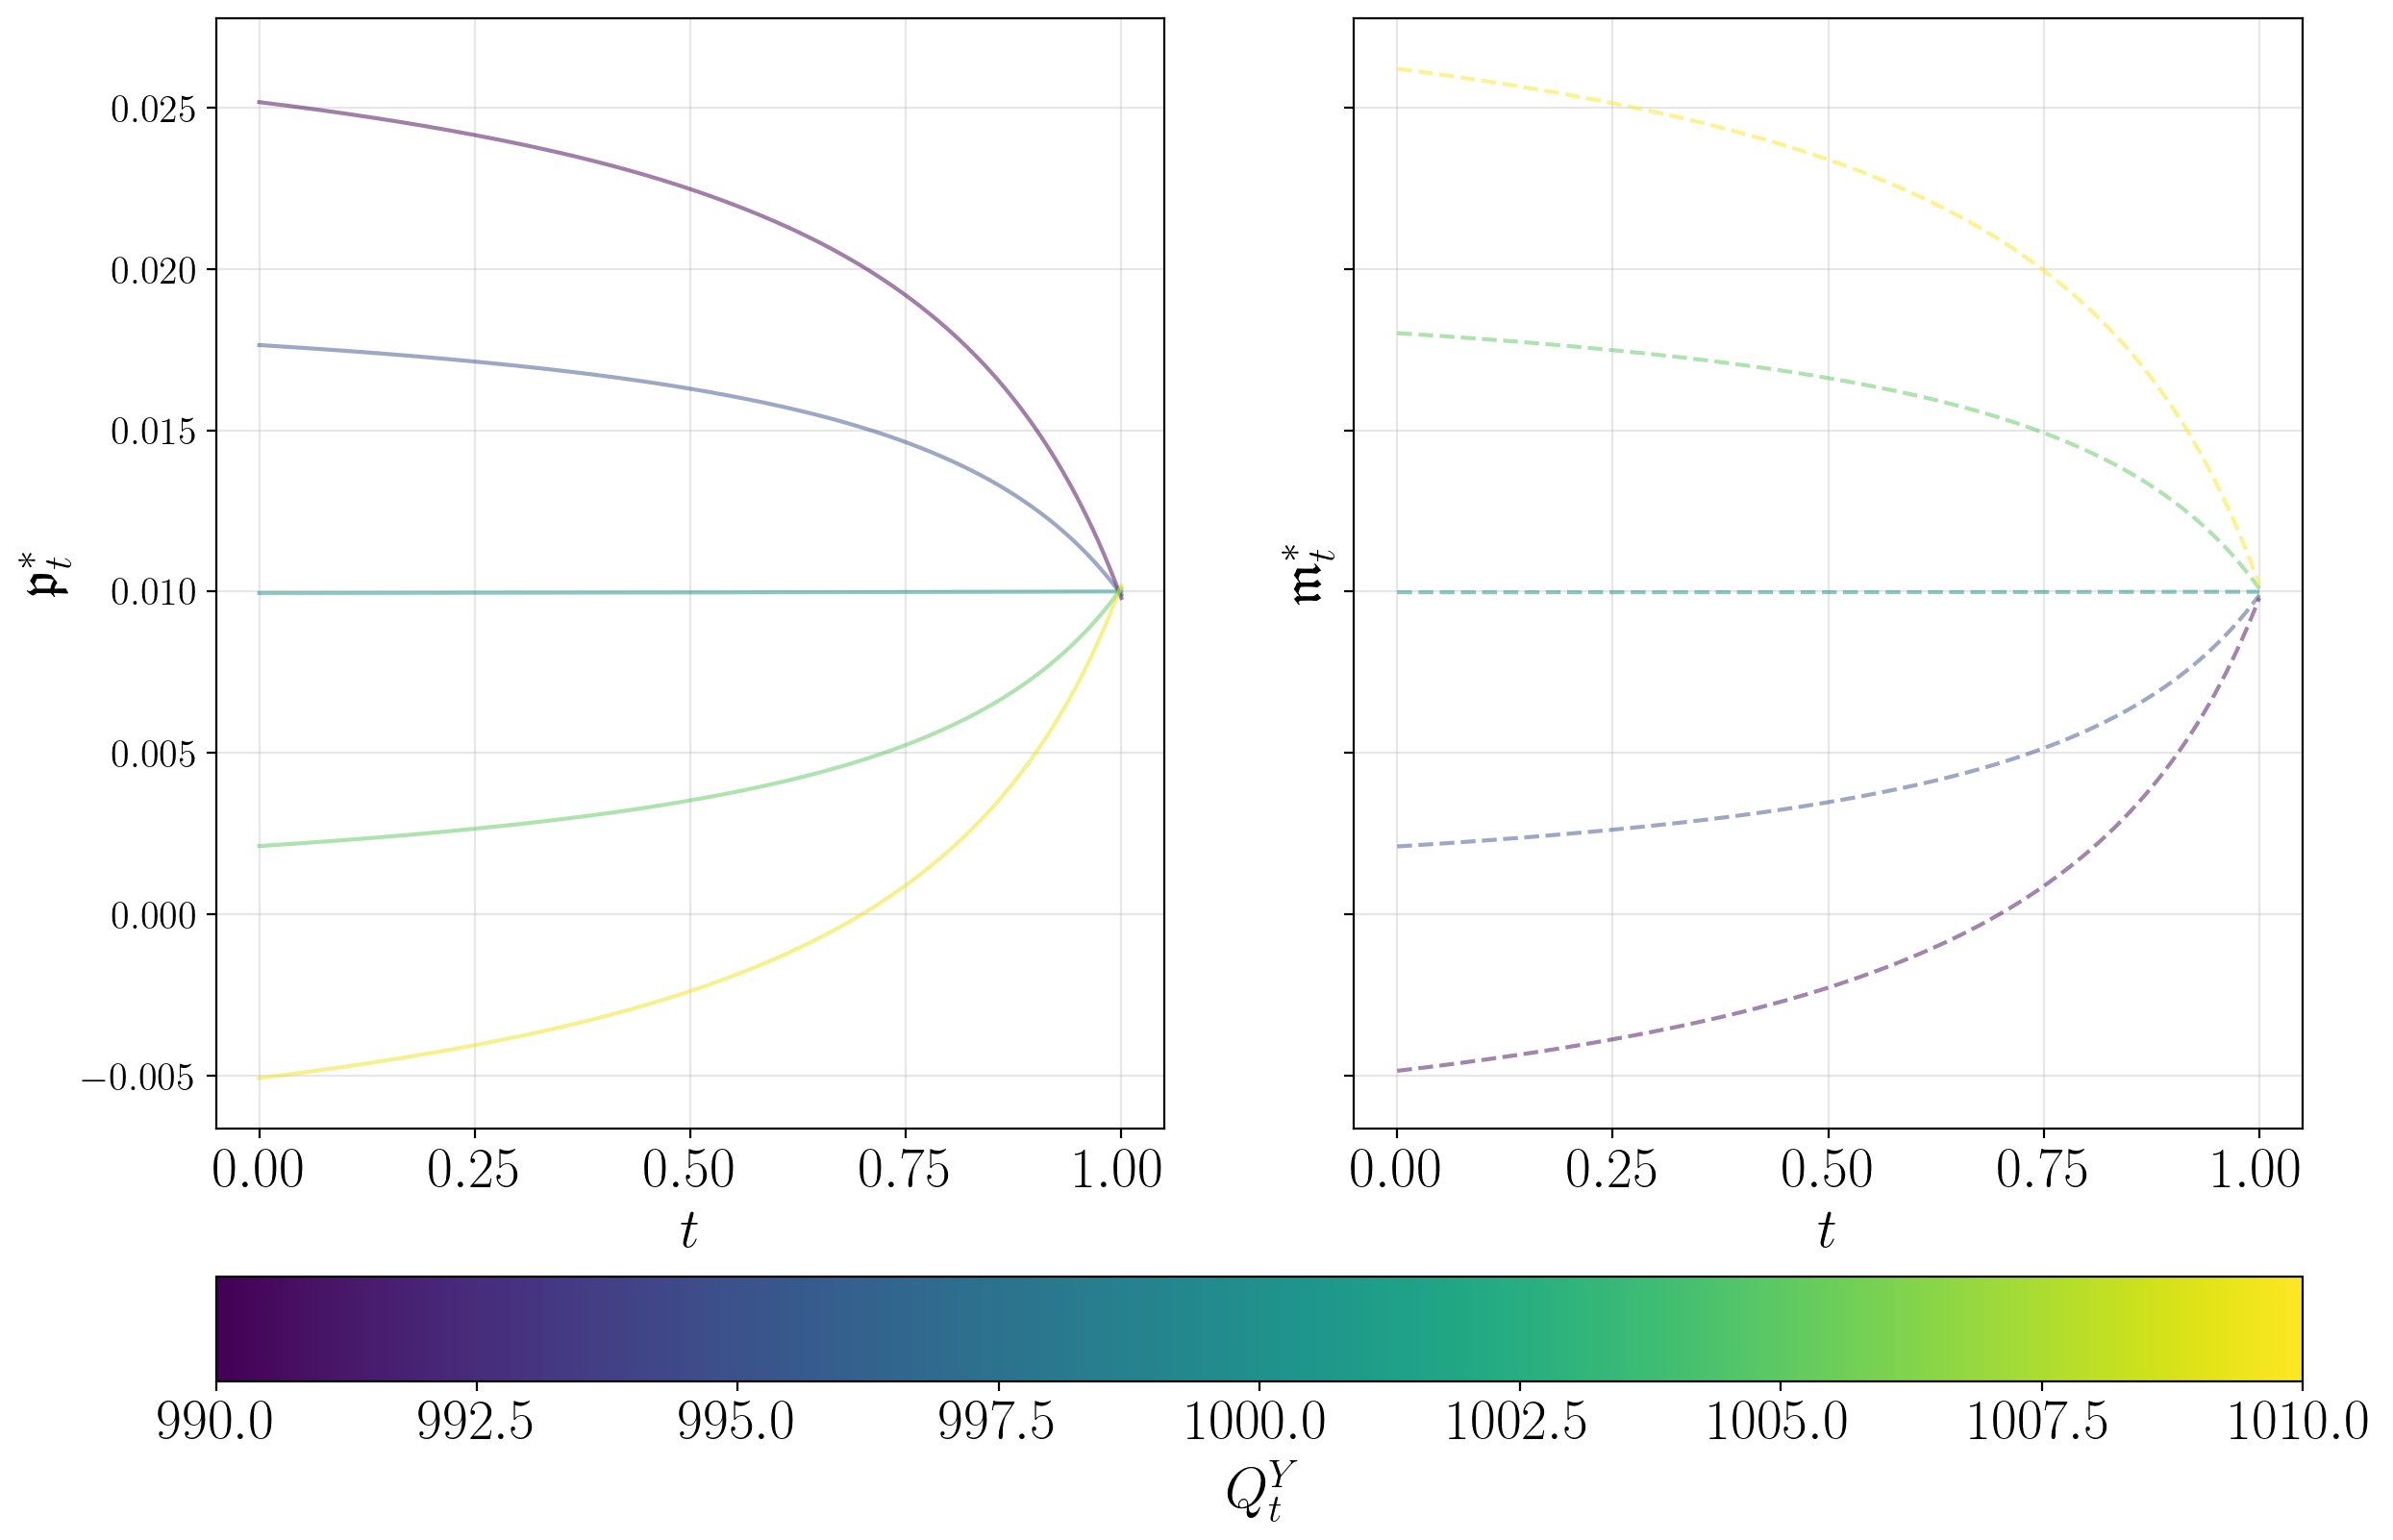

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10), sharey=True)
value_p = [0, 10, 20, 30, 39]
value_m = [1, 10, 20, 30, 40]

for i, q in enumerate(value_p):
    color = cmap(norm(AMM.y_grid[q]))
    ax[0].plot(t_vector, p[q, :], '-', color=color, alpha=0.5)

for i, q in enumerate(value_m):
    color = cmap(norm(AMM.y_grid[q]))
    ax[1].plot(t_vector, m[q, :], '--', color=color, alpha=0.5)

ax[0].set_xlabel(r'$t$', fontsize=fs)
ax[1].set_xlabel(r'$t$', fontsize=fs)
ax[0].set_ylabel(r'$\mathfrak{p}^*_t$', fontsize=fs)
ax[1].set_ylabel(r'$\mathfrak{m}^*_t$', fontsize=fs)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[0].tick_params(axis='x', labelsize=fs)
ax[1].tick_params(axis='x', labelsize=fs)

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.1)
cbar.ax.tick_params(labelsize=fs)
cbar.set_label(r'$Q^Y_t$', fontsize=fs)

#plt.tight_layout()
plt.savefig('figures/Optimal_fees_lin_quadratic_approx_through_time_fct_of_Q_t.pdf', format="pdf", dpi=dpi)
plt.show()

# Comparison of the two value functions

In [76]:
AMM = utils.first_approximation(**params)

In [77]:
t_sol, g_sol = lin_quad._calculate_g_t(100)

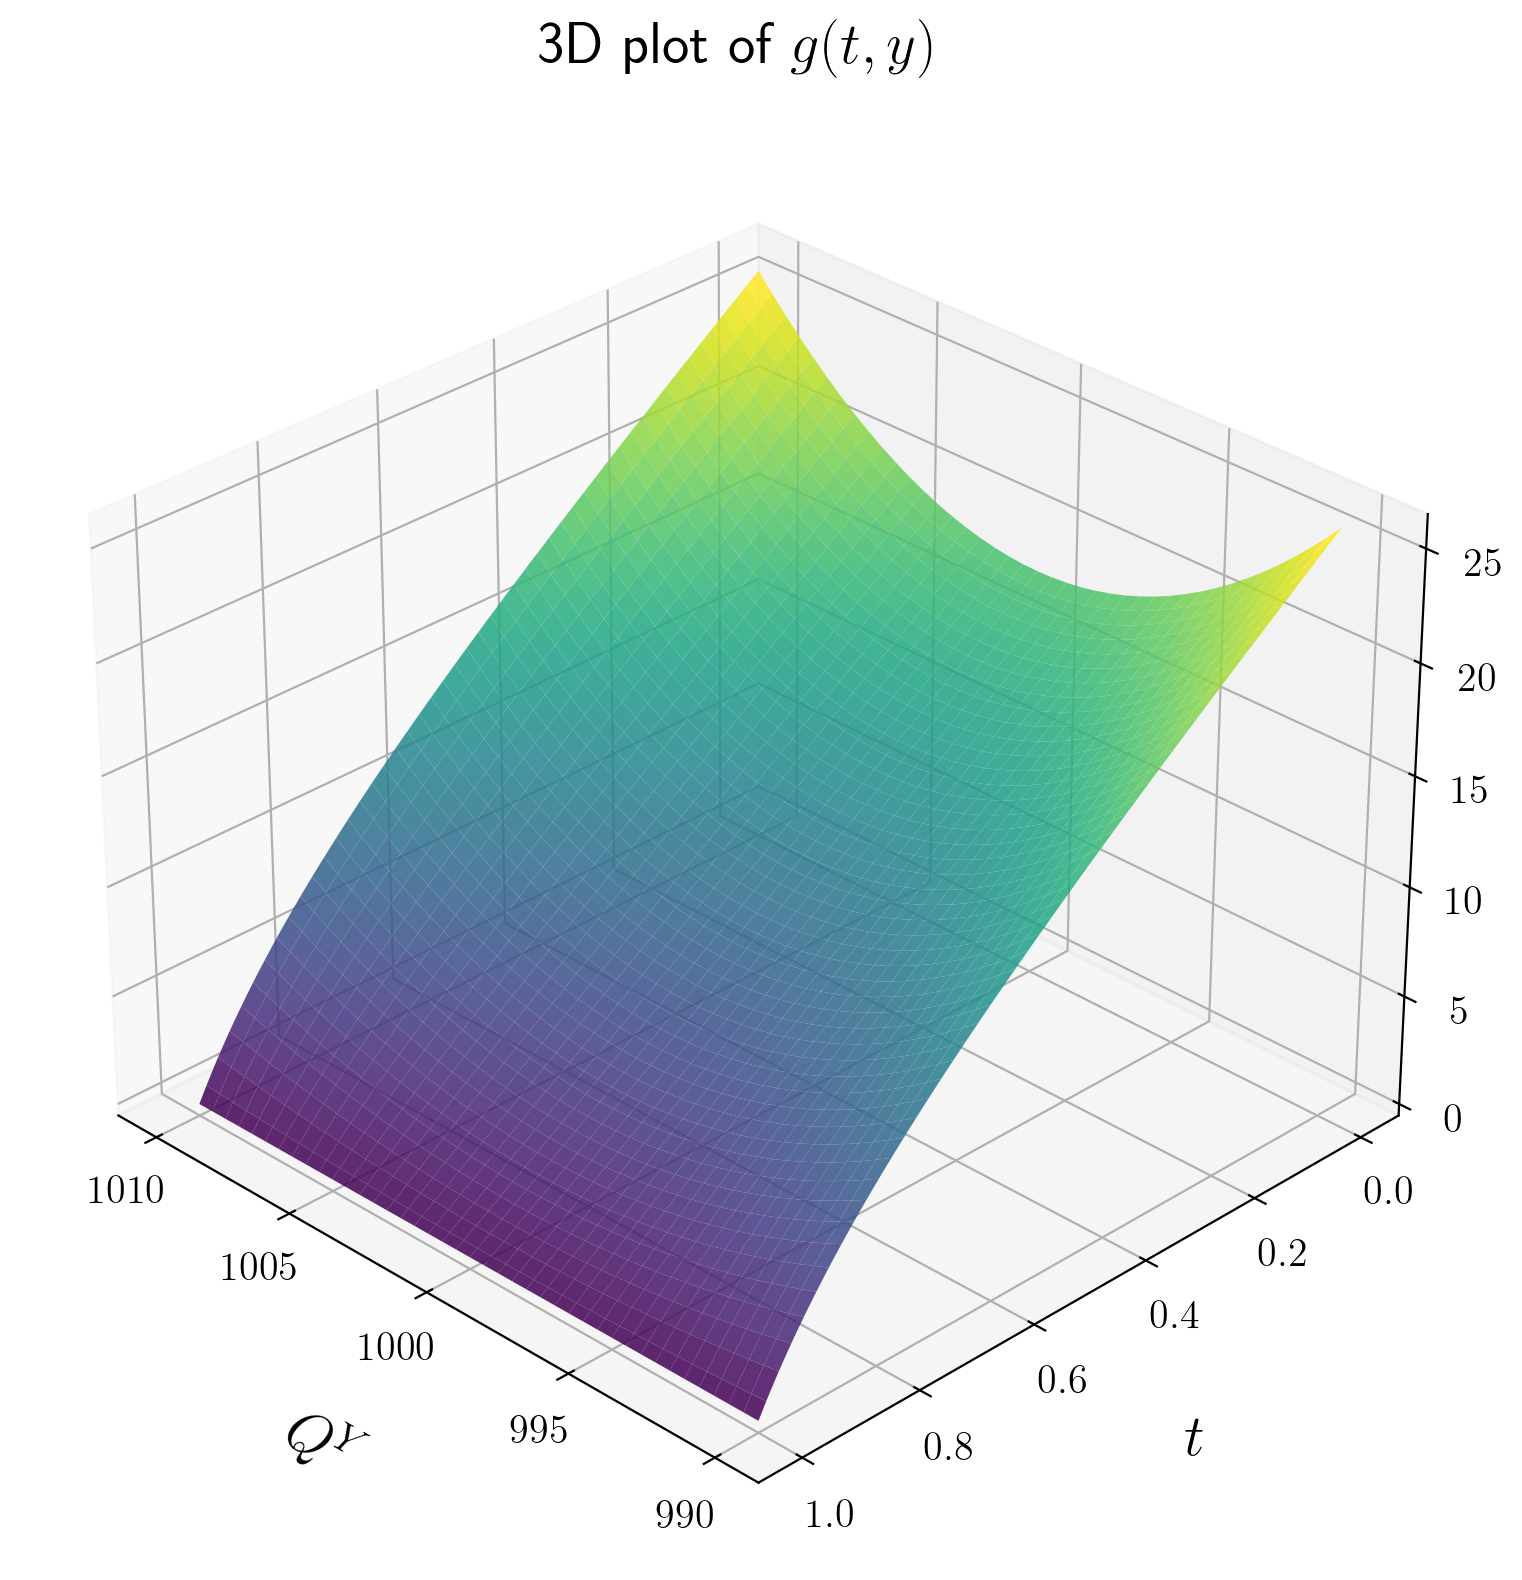

In [78]:
# Meshgrid
T, Y = np.meshgrid(t_sol, y_grid, indexing='ij')  # T: tempo, Y: spazio

# Figura
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie
surf = ax.plot_surface(Y, T, g_sol, cmap='viridis', alpha=0.85, edgecolor='none')

# Etichette
ax.set_xlabel(r'$Q^Y$', fontsize=fs, labelpad=fs)
ax.set_ylabel(r'$t$', fontsize=fs, labelpad=fs)
ax.set_zlabel(r'$g(t, y)$', fontsize=fs, labelpad=fs)
ax.set_title(r'3D plot of $g(t,y)$', fontsize=fs, pad=fs)

# Vista 3D
ax.view_init(elev=30, azim=135)
ax.grid(True)

# Tick y personalizzati (asse X nel plot): 5 valori equidistanti inclusi gli estremi
dim = len(y_grid)
indices = np.linspace(0, dim - 1, 5, dtype=int)
y_ticks = y_grid[indices]
ax.set_xticks(y_ticks)

plt.tight_layout()
plt.savefig('figures/g(t,y)_second_approx.pdf', format="pdf", dpi=dpi)
plt.show()

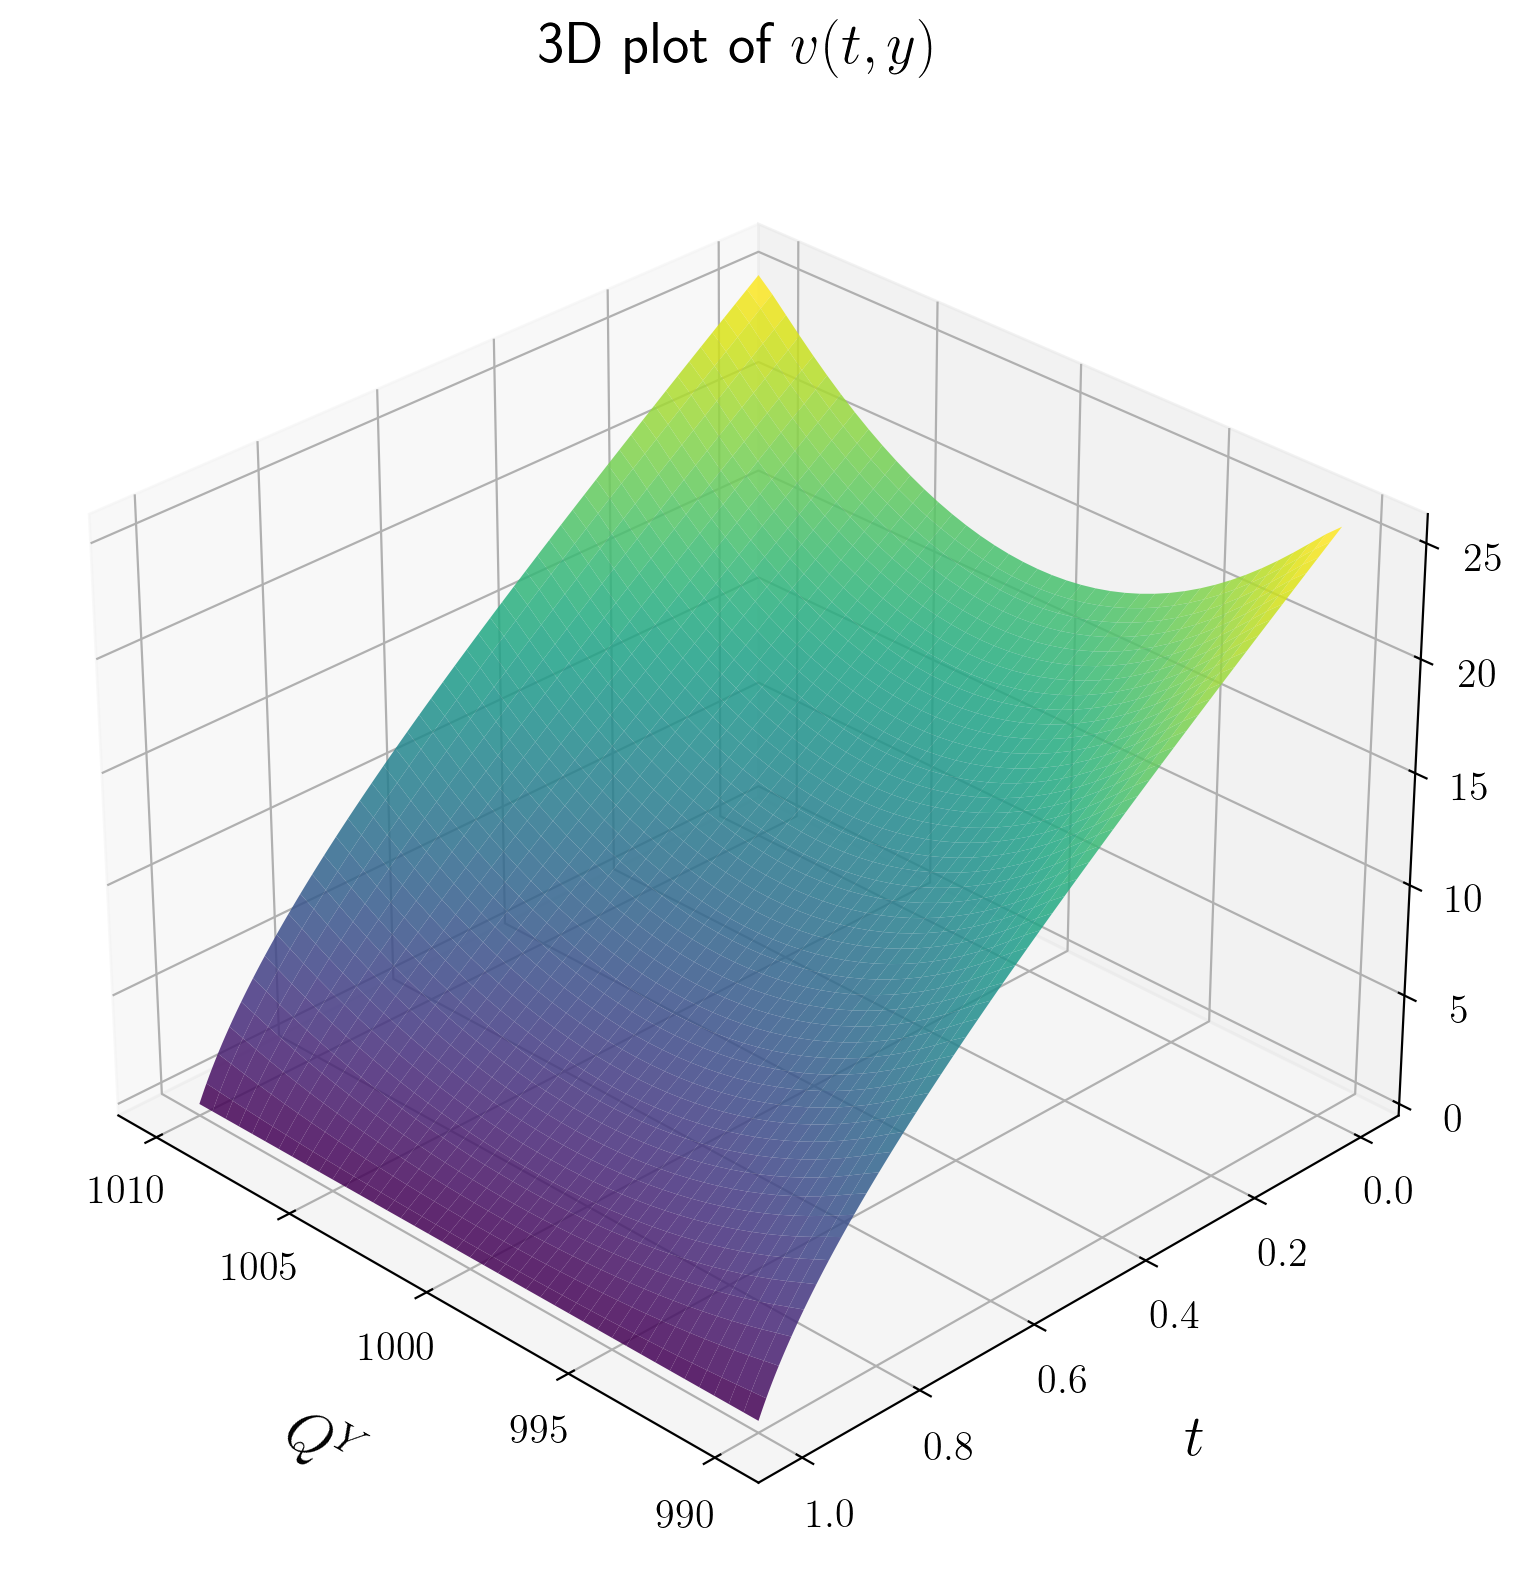

In [79]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters
Nt = 1000
# Assume AMM.T and AMM.dim, and y_grid are already defined.

# Create a time vector with Nt+1 points to match the v_t rows
t_vector = np.linspace(0, AMM.T, num=Nt+1)

# Compute v_t for each time step; v_t has shape (Nt+1, AMM.dim)
v_t = np.zeros((Nt+1, AMM.dim))
for i, t in enumerate(t_vector):
    v_t[i, :] = AMM._calculate_v_t(t).flatten()

# Create the meshgrid.
# Note: We want the X-axis to be y_grid and the Y-axis to be t_vector,
# so we call np.meshgrid with y_grid first.
Y, T = np.meshgrid(y_grid, t_vector)  # Both Y and T have shape (Nt+1, AMM.dim)

# Create the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface: 
# - X = Y (which contains the actual y_grid values),
# - Y = T (time),
# - Z = v_t.
surf = ax.plot_surface(Y, T, v_t, cmap='viridis', alpha=0.85, edgecolor='none')

# Set labels with LaTeX formatting
ax.set_xlabel(r'$Q^Y$', fontsize=fs, labelpad=fs)
ax.set_ylabel(r'$t$', fontsize=fs, labelpad=fs)
ax.set_zlabel(r'$v(t, Q^Y)$', fontsize=fs, labelpad=fs)
ax.set_title(r'3D plot of $v(t, y)$', fontsize=fs, pad=fs)

# Adjust the view for a better perspective and enable grid lines.
ax.view_init(elev=30, azim=135)
ax.grid(True)

# Set custom tick marks on the Q^Y axis (X-axis).
# Choose 5 equally spaced values from y_grid (including extremes).
indices = np.linspace(0, AMM.dim - 1, 5, dtype=int)
y_ticks = y_grid[indices]
ax.set_xticks(y_ticks)

plt.tight_layout()
plt.savefig('figures/v(t,y)_first_approx.pdf', format="pdf", dpi=dpi)

plt.show()

In [80]:
reload(utils)

<module 'src.utils' from '/Users/leonardobaggiani/Desktop/GitHub/amm-fees/src/utils.py'>

In [81]:
y_grid = np.array([990 + i*0.5 for i in range(0,41)])
params["y_grid"] = y_grid
params["int_buy"] = 150
params["int_sell"] = 150
params["kappa"]=2

In [82]:
test = utils.new(**params)

In [83]:
nsims = 1_000
Nt = 1000
seed = 123

In [84]:
(cash_FA, _, n_sell_order_FA, n_buy_order_FA, traj_y_FA)= test.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed,  strategy = "First Approximation", return_trajectory=True)
(cash_SA, _, n_sell_order_SA, n_buy_order_SA, traj_y_SA)= test.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed,  strategy = "Second Approximation", return_trajectory=True)
(cash_Const_c, _, n_sell_order_Const_c, n_buy_order_Const_c, traj_y_const_c)= test.simulate_PnL(nsims = nsims, Nt =Nt, seed= seed, c=0.01, strategy = "Constant", return_trajectory=True)

Simulating PnL:   0%|          | 0/1000 [00:00<?, ?it/s]

Simulating PnL: 100%|██████████| 1000/1000 [00:00<00:00, 10364.11it/s]


In [85]:
ZFA = -test.der_level_fct(traj_y_FA)
ZSA = -test.der_level_fct(traj_y_SA)
Zcons_c = -test.der_level_fct(traj_y_const_c)

QVFA = np.sum(np.diff(ZFA,axis=1)**2,axis=1)
QVSA = np.sum(np.diff(ZSA,axis=1)**2,axis=1)
QVconst_c = np.sum(np.diff(Zcons_c,axis=1)**2,axis=1)

Fees = ["FA", "SA", "Constant_c"]
Revenue = [np.mean(cash_FA),np.mean(cash_SA),np.mean(cash_Const_c)]
N_sell_order = [np.mean(n_sell_order_FA),np.mean(n_sell_order_SA),np.mean(n_sell_order_Const_c)]
N_buy_order = [np.mean(n_buy_order_FA),np.mean(n_buy_order_SA),np.mean(n_buy_order_Const_c)]
Q_var = [np.mean(QVFA),np.mean(QVSA),np.mean(QVconst_c)]

In [86]:
df = pd.DataFrame({
    "type of fees": Fees,
    "collected fees": np.round(Revenue,2),
    "sell orders": np.round(N_sell_order,2),
    "buy orders": np.round(N_buy_order,2),
    "quadratic variation": np.round(Q_var,2),
})

In [87]:
df

type of fees  collected fees  sell orders  buy orders  quadratic variation
0           FA           52.98        53.36       53.48                 1.01
1           SA           53.01        51.60       51.62                 0.98
2   Constant_c           52.21        52.14       52.27                 0.99